<a href="https://colab.research.google.com/github/Lamlisaho/Python-Project/blob/main/Behind_the_Beauty_Chemicals_in_Everyday_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Behind the Beauty: Chemicals in Everyday Products 💄💅🪞💋✨  

# INTRODUCTION AND CONTEXT


WHAT IS THE PROBLEM?

In an era where skincare and makeup are part of daily routines, consumers are becoming more curious—and cautious—about the ingredients in their cosmetic products. Consumers are exposed to hazardous chemicals in cosmetics, often unknowingly. Transparency and safety in cosmetic products remain a growing concern, especially with cross-border imports.

WHY DOES IT MATTER?

With rising awareness about clean beauty and safe ingredients, understanding which product categories and brands pose higher risks is critical — particularly for Australian consumers importing U.S. products.

PROJECT GOAL

This EDA project analyzes over 114,000 entries from the California Safe Cosmetics Program (CSCP), which tracks products with chemicals linked to cancer, birth defects, or reproductive harm. The analysis explores trends by brand, product type, and chemical usage.
By integrating Australian regulations from AICIS, including banned and high-hazard substances, this project provides a localized perspective. It aims to highlight common hazardous ingredients, their distribution, and associated risks - empowering Australian consumers to make safer, more informed choices.

# DATA EXPLORATION

In [ ]:
#First we need to import libraries

import pandas

import pandas as pd

from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal project Dataset/Chemicals in cosmetics.csv')
print(df.shape)
df.head()

(114635, 22)


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


## Dataset Summary


Rows: 114,635

Columns: 22

Key columns include:

- ProductName, CompanyName, BrandName

- PrimaryCategory, SubCategory

- ChemicalName, CasNumber

- InitialDateReported, MostRecentDateReported, DiscontinuedDate

- ChemicalCount – might reflect how many chemicals are reported per product entry

Notes:
- Some columns like CSF, CasNumber, and DiscontinuedDate have missing values.
- Dates are in string format and might need conversion for time-based analysis.
- Looks like some products have multiple chemical entries (likely many-to-many relationships).
- The dataset is structured at the chemical-product level, where each row represents one hazardous chemical reported in a single cosmetic product. This means a product with multiple hazardous ingredients appears across multiple rows. Understanding this granularity is essential for accurate aggregation and interpretation.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

## Columns Explanation


1. CDPHId: California Department of Public Health ID
- Represents: A unique identifier for each entry or record in the dataset, issued by the CDPH system.

2. CSFId: Color, scent, and/or flavor ID

- Represents: A unique identifier linking a product to a particular Cosmetic Submission Form.

3. CasId: Chemical Abstracts Service ID

- Represents: A numeric ID for each unique CAS Number (chemical compound).

4. CasNumber: CAS Registry Number (Chemical Abstracts Service Number)

- Represents: A globally recognized unique identifier for each chemical substance.
- Format is usually: XXX-XX-X (e.g., 13463-67-7 for Titanium Dioxide)

5. ChemicalCreatedAt: Chemical Entry Creation Date

- Represents: The timestamp when the chemical record was added to the system/database.


## Data exploratory analysis

In [ ]:
df.describe()

,CDPHId,CSFId,CompanyId,PrimaryCategoryId,SubCategoryId,CasId,ChemicalId,ChemicalCount
count,114635.000000,80662.000000,114635.000000,114635.000000,114635.000000,114635.000000,114635.000000,114635.000000
mean,20304.858987,32608.658377,450.641532,51.076294,66.819252,674.094107,32837.556959,1.288359
std,12489.052554,19089.443910,409.533093,20.474341,35.822097,149.214101,20439.412299,0.636418
min,2.000000,1.000000,4.000000,1.000000,3.000000,2.000000,0.000000,0.000000
25%,8717.000000,15789.000000,86.000000,44.000000,48.000000,656.000000,13990.000000,1.000000
50%,20895.000000,32541.000000,297.000000,44.000000,52.000000,656.000000,32055.000000,1.000000
75%,31338.500000,48717.750000,798.000000,59.000000,65.000000,656.000000,51578.500000,1.000000
max,41524.000000,65009.000000,1391.000000,111.000000,172.000000,1242.000000,68074.000000,9.000000


In [ ]:
#Checking null values

df.isnull().sum()

,0
CDPHId,0
ProductName,0
CSFId,33973
CSF,34398
CompanyId,0
CompanyName,0
BrandName,227
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0



> We can see that the dataset contains both numerical and categorical data, with missing values at some columns as the non-null values are less than the entries.



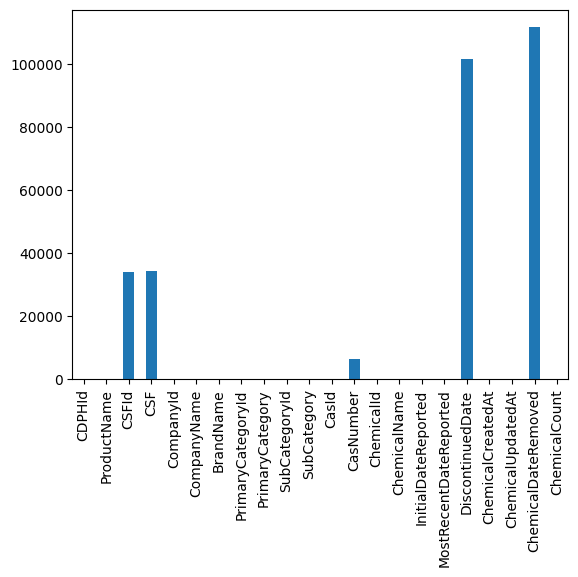

In [ ]:
df.isnull().sum().plot.bar()
plt.show()

In [ ]:
#Check the percentage of null values compared to total entries

missing_percentage = (df.isnull().sum() / len(df))*100
print(missing_percentage)

CDPHId                     0.000000
ProductName                0.000000
CSFId                     29.635801
CSF                       30.006543
CompanyId                  0.000000
CompanyName                0.000000
BrandName                  0.198020
PrimaryCategoryId          0.000000
PrimaryCategory            0.000000
SubCategoryId              0.000000
SubCategory                0.000000
CasId                      0.000000
CasNumber                  5.649235
ChemicalId                 0.000000
ChemicalName               0.000000
InitialDateReported        0.000000
MostRecentDateReported     0.000000
DiscontinuedDate          88.729446
ChemicalCreatedAt          0.000000
ChemicalUpdatedAt          0.000000
ChemicalDateRemoved       97.396083
ChemicalCount              0.000000
dtype: float64



> As we can see DiscontinuedDate and ChemicalDateRemoved are the ones with highest number of missing values.

> CSFid and CSF columns also have around 30% of missing values. In the context of cosmetics, if a product is listed without CSF, it suggests it is a clear, unscented, and/or tasteless formula.

> ChemicalDateRemoved is the one with highest number of missing values

> The removal of a chemical from a cosmetic product in America can be a multi-step process involving testing, formulation changes, regulatory compliance, supply chain adjustments, and communication.The Food and Drug Administration (FDA) can take action, including removing a chemical from the market, if there's sound scientific evidence demonstrating a product's harm under intended use. In summary, it's not a swift process, and can take anywhere from a few weeks to several months, depending on the specifics.

> How this could bias result (impact)
*   Underestimation of removals/discontinuations: current counts trend lower because future removals aren’t reported yet (right-censoring).
*   Time-to-removal metrics biased downward/upward: negative or implausible intervals (e.g., 2103 vs 2013) distort averages.
*   Category/brand comparisons: if some brands/categories report more diligently, they appear riskier simply due to better reporting.
*   SPF analyses: SPF products may be more regulated, so they can look “worse” because they’re reported more often, not necessarily more hazardous.

> To account for this, no values were imputed. Instead, we created flags to explicitly track missing data, filtered implausible values (e.g., negative time intervals), and conducted scenario-based analyses to assess the impact. These steps help ensure the findings remain robust while acknowledging limitations due to reporting lags and incomplete records.


In [ ]:
#Finding products with missing CSF and CSFid

null_csf_rows = df[df['CSF'].isnull()]
null_csfid_rows = df[df['CSFId'].isnull()]

print(null_csf_rows.head(20).to_string(index=False))

 CDPHId                                               ProductName  CSFId CSF  CompanyId                         CompanyName                                            BrandName  PrimaryCategoryId                   PrimaryCategory  SubCategoryId                                SubCategory  CasId  CasNumber  ChemicalId            ChemicalName InitialDateReported MostRecentDateReported DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  ChemicalCount
      2          ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES    NaN NaN          4                        New Avon LLC                                                 AVON                 44   Makeup Products (non-permanent)             53 Lip Color - Lipsticks, Liners, and Pencils    656 13463-67-7           6        Titanium dioxide          06/17/2009             08/28/2013       02/01/2011        07/09/2009        07/09/2009                 NaN              1
      3                                Glover's Medica

> Products that are clear, unscented, and/or tasteless formula does not mean they do not contain hazardous chemicals



Let's dive into analysing the chemicals

Text(0, 0.5, 'Chemical Name')

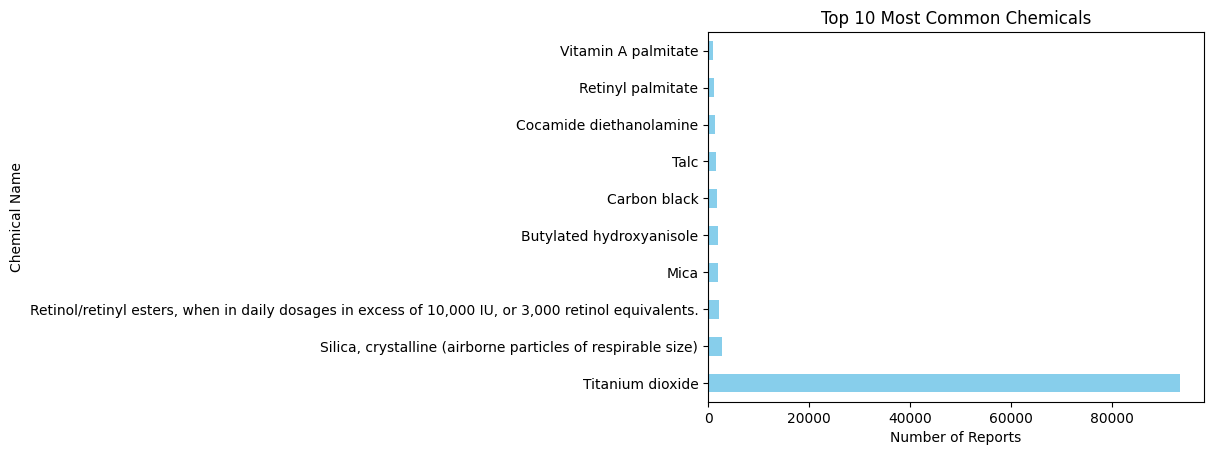

In [ ]:
#Find the most commonly harzadous chemicals reported in cosmetic products

top_chemicals = df['ChemicalName'].value_counts().head(10)
top_chemicals.plot(kind='barh', title='Top 10 Most Common Chemicals', color='skyblue')
plt.xlabel('Number of Reports')
plt.ylabel('Chemical Name')

Text(0, 0.5, 'Chemical Name')

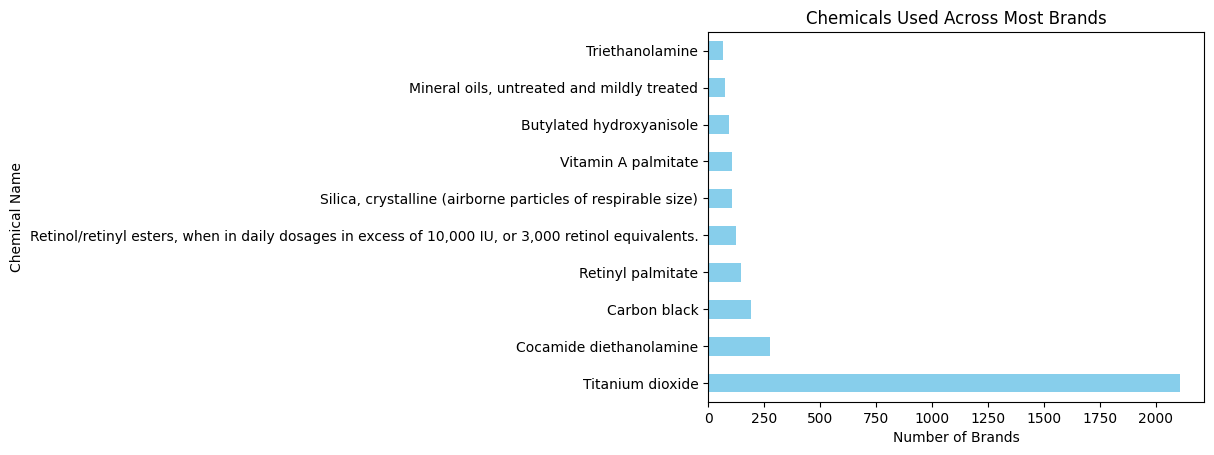

In [ ]:
#Harzadous chemicals that are used across many brands and product categories

#Top chemicals by spread
chemical_spread = df.groupby('ChemicalName')['BrandName'].nunique().sort_values(ascending=False).head(10)
chemical_spread.plot(kind='barh', title='Chemicals Used Across Most Brands', color='skyblue')
plt.xlabel('Number of Brands')
plt.ylabel('Chemical Name')



> Titanium dioxide (TiO₂) is the most frequently reported harzadous chemical in this dataset with more than 80000 times of appearances and is used by more than 2000 brands.

> Titanium dioxide (TiO₂) can be classified as a hazardous chemical in cosmetic products due to potential health risks, particularly when inhaled. The International Agency for Research on Cancer (IARC) has classified TiO₂ as "possibly carcinogenic to humans" based on studies showing increased lung tumors in animals after inhalation. While these studies don't necessarily translate to the same risks for humans, there are concerns about the potential for TiO₂ nanoparticles to penetrate the skin and respiratory system, leading to potential health effects.





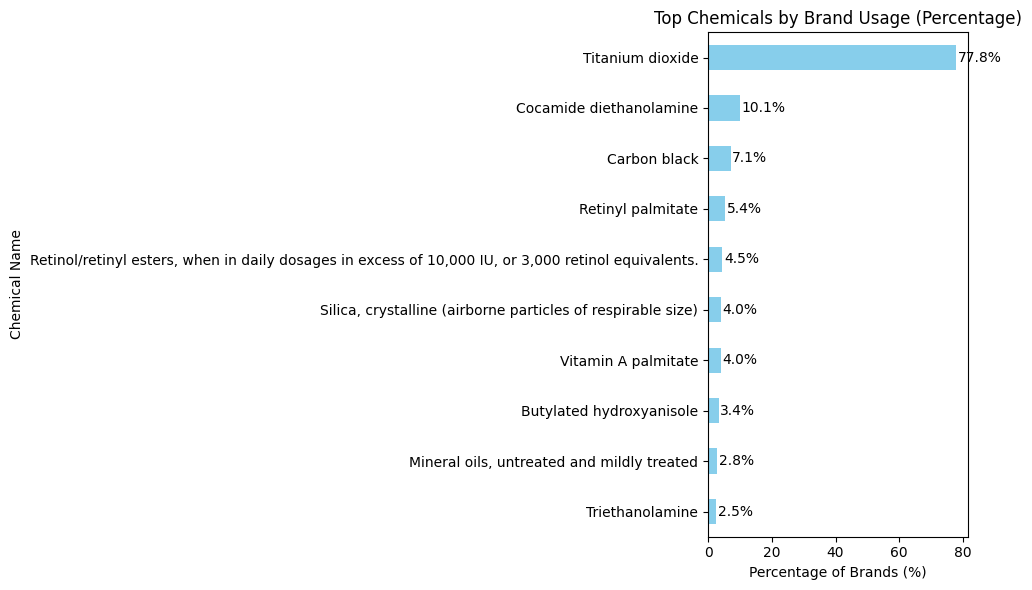

In [ ]:
#Can also view them in percentage to see the significance

import matplotlib.pyplot as plt

# Calculate top 10 chemicals by brand spread
chemical_brand_counts = df.groupby('ChemicalName')['BrandName'].nunique()
top_chemicals = chemical_brand_counts.sort_values(ascending=False).head(10)

# Convert to percentages
total_brands = df['BrandName'].nunique()
top_chemicals_percent = (top_chemicals / total_brands) * 100

# Sort for nicer visual
top_chemicals_percent = top_chemicals_percent.sort_values()

# Plot
ax = top_chemicals_percent.plot(
    kind='barh',
    title='Top Chemicals by Brand Usage (Percentage)',
    color='skyblue',
    figsize=(10,6)
)

# Annotate bars with percentage values
for i, value in enumerate(top_chemicals_percent):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center')

plt.xlabel('Percentage of Brands (%)')
plt.ylabel('Chemical Name')
plt.tight_layout()
plt.show()


>

> Titanium dioxide (TiO₂) was found in 77.8% recorded brands in the dataset.

<Axes: title={'center': 'Top Brands by Number of Unique harzadous Chemicals'}, xlabel='BrandName'>

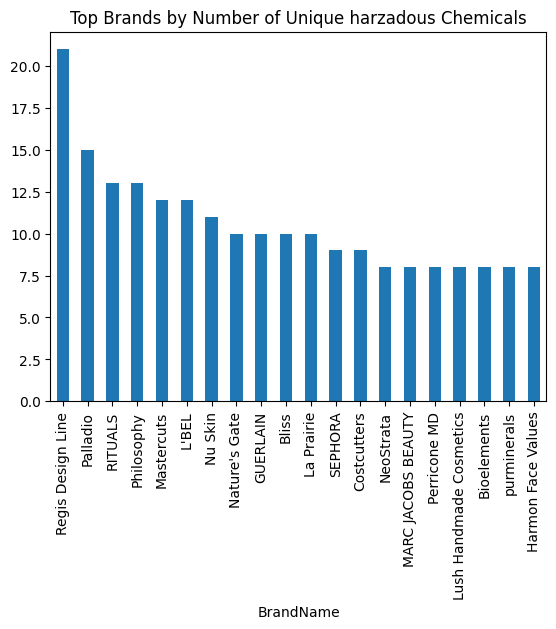

In [ ]:
#Find brands or companies have the highest number of distinct reported harzadous chemicals?

chemicals_per_brand = df.groupby('BrandName')['ChemicalName'].nunique().sort_values(ascending=False).head(20)
chemicals_per_brand.plot(kind='bar', title='Top Brands by Number of Unique harzadous Chemicals')


> The analysis identified Regis Design Line, Palladio, Rituals, Philosophy, and Mastercuts as the top five cosmetic brands associated with the highest number of unique hazardous chemicals. This insight highlights the importance of informed purchasing decisions, particularly for Australian consumers who may be importing these products.

According to Australian Academy of Science, a typical cosmetic product contains around 15-50 unique chemical ingredients. Let's see how the distribution of hazardous chemicals in the total ingredients of a cosmetic product.

In [ ]:
# Get the number of hazardous chemicals per product
hazardous_chemicals_per_product = df.groupby('ProductName')['ChemicalName'].nunique()

# Calculate the average
avg_hazardous_per_product = hazardous_chemicals_per_product.mean()

print(f"Average number of hazardous chemicals per product: {avg_hazardous_per_product:.2f}")

Average number of hazardous chemicals per product: 1.14


In [ ]:
# Find mean and median
mean_chemicals = df['ChemicalCount'].mean()
median_chemicals = df['ChemicalCount'].median()

print(f"Mean hazardous chemicals per product: {mean_chemicals:.2f}")
print(f"Median hazardous chemicals per product: {median_chemicals:.2f}")


Mean hazardous chemicals per product: 1.29
Median hazardous chemicals per product: 1.00


In [ ]:
# Calculate mean and median hazardous chemicals per product by category
category_stats = df.groupby('PrimaryCategory')['ChemicalCount'].agg(['mean', 'median'])
display(category_stats)

,mean,median
PrimaryCategory,,
Baby Products,0.979592,1.0
Bath Products,1.069821,1.0
Fragrances,1.056575,1.0
Hair Care Products (non-coloring),1.416049,1.0
Hair Coloring Products,1.029112,1.0
Makeup Products (non-permanent),1.319794,1.0
Nail Products,1.301492,1.0
Oral Hygiene Products,1.015238,1.0
Personal Care Products,1.002614,1.0


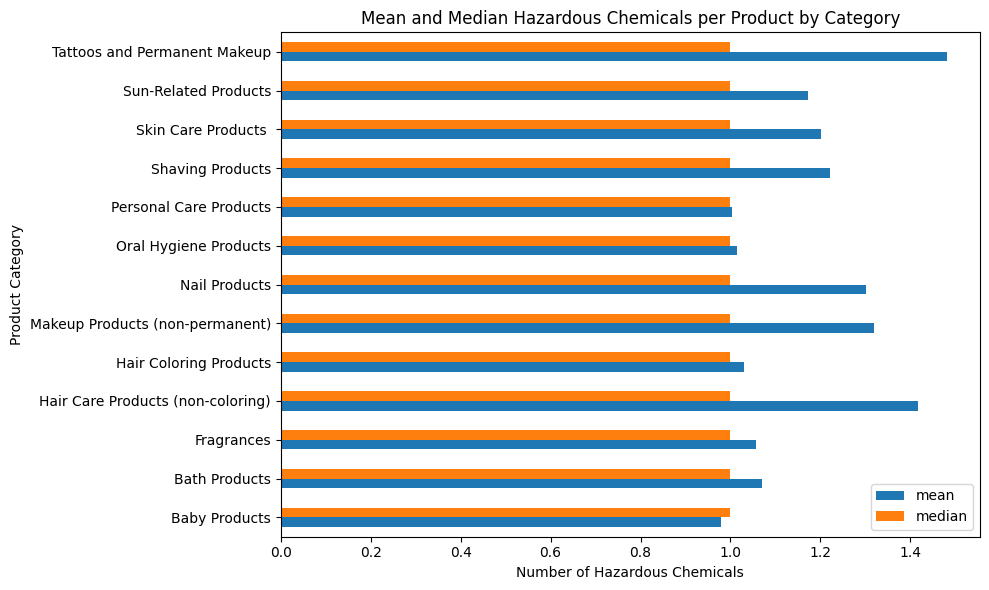

In [ ]:
category_stats.plot(kind='barh', figsize=(10,6))
plt.title('Mean and Median Hazardous Chemicals per Product by Category')
plt.xlabel('Number of Hazardous Chemicals')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

> Mean: Sensitive to outliers. A few products with an unusually high number of hazardous chemicals can skew the average.

> Median: Represents the middle value. It gives a better sense of what's typical, especially when the data is skewed.

> Comparing both gives a fuller picture of the data distribution and helps us avoid misleading conclusions based only on the mean.

In [ ]:
print("Typical total ingredients in a cosmetic product: 15 to 50")

percentage_range = (
    (avg_hazardous_per_product / 50) * 100,
    (avg_hazardous_per_product / 15) * 100
)

print(f"On average, hazardous chemicals make up about {percentage_range[0]:.1f}% to {percentage_range[1]:.1f}% of all ingredients in a typical cosmetic product.")


Typical total ingredients in a cosmetic product: 15 to 50
On average, hazardous chemicals make up about 2.3% to 7.6% of all ingredients in a typical cosmetic product.


> If there is an average of 1.14 hazardous chemicals per product:

- Compared to 15 total ingredients → ~2.3% may be hazardous

- Compared to 50 total ingredients → ~7.6% may be hazardous

 According to the Cancer Council, Australia has one of the highest skin cancer rates in the world. And SPF in cosmetics can help protect our skin. However, unless we are using makeup that has SPF30 or above, we will need to also use a high SPF sunscreen to adequately protect your skin from the suns rays. Let's see what cosmetic products with SPF indicator got reported to have high-hazard chemicals in this dataset:

In [ ]:
# Filter products with names containing 'SPF' (case insensitive)
spf_products = df[df['ProductName'].str.contains(r'\bSPF\b|\bSPF[- ]?\d+', case=False, na=False)]

# \bSPF[- ]?\d+ matches patterns like SPF15, SPF-30, SPF 50, etc.
# \bSPF\b matches "SPF" as a whole word
# case=False makes it case-insensitive
# na=False avoids errors from null values

print('There are',spf_products.shape[0], 'products whose name contains SPF indicator. Some examples below:')  # Number of products
# Display
print(spf_products[['ProductName', 'BrandName', 'PrimaryCategory']].head(30).to_string(index=True))

There are 7322 products whose name contains SPF indicator. Some examples below:
                                                 ProductName                                             BrandName       PrimaryCategory
36      Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Sun-Related Products
37      Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Sun-Related Products
47                 Aloe Up Lil' Kids SPF 30+ Sunscreen Stick             Aloe Up Lil' Kids SPF 30+ Sunscreen Stick  Sun-Related Products
48                            Aloe Up SPF 30 Sunscreen Stick                        Aloe Up SPF 30 Sunscreen Stick  Sun-Related Products
316         The Supernatural Poreless Flawless Tinted SPF 15                                            Philosophy  Sun-Related Products
317         The Supernatural Poreless Flawless Tinted SPF 15                                      

In [ ]:
#Doing like above is uneccesary because
# This uses a regex pattern that checks for:
# \bSPF\b: the exact word “SPF”
# or SPF followed by an optional hyphen or space and some digits (SPF-15, SPF 30, etc.)
# While detailed, it's unnecessarily restrictive and could miss products that contain slightly different SPF mentions (e.g. SPF50+, spfmax, spfbooster, etc.)
# Unless you're doing precise parsing, this is overkill for just flagging SPF-containing product names.
#So we replace above with the below code:

spf_products = df[df['ProductName'].str.contains('spf', case=False, na=False)]
print('There are',spf_products.shape[0], 'products whose name contains SPF indicator. Some examples below:')  # Number of products
# Display
print(spf_products[['ProductName', 'BrandName', 'PrimaryCategory']].head(30).to_string(index=True))

There are 7331 products whose name contains SPF indicator. Some examples below:
                                                 ProductName                                             BrandName       PrimaryCategory
36      Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Sun-Related Products
37      Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Aloe Up Lil' Kids SPF 45 Aloe Based Sunscreen Lotion  Sun-Related Products
47                 Aloe Up Lil' Kids SPF 30+ Sunscreen Stick             Aloe Up Lil' Kids SPF 30+ Sunscreen Stick  Sun-Related Products
48                            Aloe Up SPF 30 Sunscreen Stick                        Aloe Up SPF 30 Sunscreen Stick  Sun-Related Products
316         The Supernatural Poreless Flawless Tinted SPF 15                                            Philosophy  Sun-Related Products
317         The Supernatural Poreless Flawless Tinted SPF 15                                      



> In Australia, sunscreens are divided into 2 categories:
- therapeutic sunscreens
- cosmetic sunscreens

> Cosmetic sunscreens include:
- products applied to the lips (such as lipsticks and lip balms) that contain sunscreen with an SPF of 4 or more
- tinted bases and foundations (including liquids, pastes and powders) that  contain sunscreen with an SPF of 4 or more
- moisturising skin-care products that contain sunscreen with an SPF of 15 or less, that are in a pack size no larger than 300ml or 300g
- sunbathing skin-care products with sunscreen that contain an SPF between 4 and 15, and are in a pack size no larger than 300ml or 300g

> It can be concluded that all of these SPF-related products in this dataset are all considered cosmetics sunscreen in Australia.

The following analysis investigates the presence of banned chemicals within the dataset and explores regulatory frameworks in both the United States and Australia. This aims to provide insights into consumer safety, public health awareness, and the alignment—or disparity—of international cosmetic standards.

In the US, the regulation of cosmetics is overseen by the Food and Drug Administration (FDA) under the Federal Food, Drug and Cosmetics Act (FD&C Act).

Compared to the EU’s extensive list of banned chemicals in cosmetics, the number of substances restricted or prohibited by the FDA is very small and includes examples like:

1. Chloroform: prohibited because of its association with cancer risk
2. Methylene Chloride: banned due to its carcinogenic properties
3. Vinyl Chloride: restricted in aerosol cosmetics products due to its carcinogenic properties
4. Hexachlorophene: restricted to no more than 0.1% due to its potential neurotoxic effects

The FDA’s approach to regulating cosmetics focuses more on post-market surveillance and voluntary guidelines rather than pre-market approval, resulting in a shorter list of banned or restricted chemicals compared to other regions like the EU.

We will check to see if the above four restricted substances are reported in our dataset:  

In [ ]:
#FIND PRODUCTS THAT INCLUDE BANNED CHEMICALS

# List of target chemicals
target_chemicals = ['Chloroform', 'Methylene Chloride', 'Vinyl Chloride', 'Hexachlorophene']

# Filter dataset
hazardous_products = df[df['ChemicalName'].isin(target_chemicals)]

# See results
print(f"Number of matching entries: {hazardous_products.shape[0]}")
hazardous_products[['ProductName', 'BrandName', 'ChemicalName']].drop_duplicates().head(10)


Number of matching entries: 0


,ProductName,BrandName,ChemicalName




> There is none of the listed banned chemicals in any of the reported products.

But this is incorrect, let's see below:



In [ ]:
#Feedback for the code above is that: all the target chemicals put in there are strings, need to make sure similar strings are counted instead of looking for exact match from the list
#Solution: Match any row where ChemicalName contains a target chemical string (not exact match), and do so case-insensitively.

# List of banned chemical substrings (case-insensitive)
target_chemicals = ['Chloroform', 'Methylene Chloride', 'Vinyl Chloride', 'Hexachlorophene']

# Create a regex pattern from the list
pattern = '|'.join(target_chemicals)
#|.join(...) creates a regex that matches any of the banned chemical names
#This becomes a regular expression pattern that means:
#Match any row where ChemicalName contains either Chloroform OR Methylene Chloride OR Vinyl Chloride OR
# | in regex = OR / '|'.join(...) turns a list into an OR-based search
# It's powerful because it handles all partial matches in one line

# Filter dataset where 'ChemicalName' contains any banned chemical
hazardous_products = df[df['ChemicalName'].str.contains(pattern, case=False, na=False)]

# Show results
print(f"Number of matching entries: {hazardous_products.shape[0]}")
hazardous_products[['ProductName', 'BrandName', 'ChemicalName']].drop_duplicates().head(10)


Number of matching entries: 8


,ProductName,BrandName,ChemicalName
15618,Hydrate Shampoo,Regis Design Line,Dichloromethane (Methylene chloride)
15659,Hydrate Conditioner,Regis Design Line,Dichloromethane (Methylene chloride)
15716,Curl Lock Conditioner,Regis Design Line,Dichloromethane (Methylene chloride)
17523,Interrupt Texturizing Clay,Costcutters,Dichloromethane (Methylene chloride)
17566,Texturizing Clay,Mastercuts,Dichloromethane (Methylene chloride)
17925,Intensity Conditioning Treatment,Mastercuts,Dichloromethane (Methylene chloride)


California’s Toxic-Free Cosmetics Act Bans 24 Ingredients From Cosmetic Products

Effective January 1, 2025, a new California law will prohibit 24 ingredients from use in cosmetic products.The law prohibits the manufacture, sale, delivery, holding, or offering for sale in commerce of any cosmetic product intentionally containing any of the following ingredients: (1) Dibutyl phthalate; (2) Diethylhexyl phthalate; (3) Formaldehyde; (4) Paraformaldehyde; (5) Methylene glycol; (6) Quaternium-15; (7) Mercury; (8) Isobutylparaben; (9) Isopropylparaben; (10) m-Phenylenediamine and its salts; (11) o-Phenylenediamine and its salts; and (12) thirteen specific per- and polyfluoroalkyl substances (PFAS) and their salts.

In [ ]:
# List of banned chemicals under California’s Toxic-Free Cosmetics Act
banned_chemicals = [
    'Dibutyl phthalate',
    'Diethylhexyl phthalate',
    'Formaldehyde',
    'Paraformaldehyde',
    'Methylene glycol',
    'Quaternium-15',
    'Mercury',
    'Isobutylparaben',
    'Isopropylparaben',
    'm-Phenylenediamine',
    'm-Phenylenediamine and its salts',
    'o-Phenylenediamine',
    'o-Phenylenediamine and its salts'
]

# Add PFAS manually (if known)
pfas_keywords = ['perfluoro', 'polyfluoro', 'PFAS']  # broad terms to capture PFAS variants

# Filter products with banned chemicals
banned_products = df[df['ChemicalName'].str.lower().isin([chem.lower() for chem in banned_chemicals])]

# Also look for PFAS using keyword matching
pfas_products = df[df['ChemicalName'].str.lower().str.contains('|'.join(pfas_keywords))]

# Combine both
toxic_act_products = pd.concat([banned_products, pfas_products]).drop_duplicates()

# Display results
print(f"Number of products containing chemicals banned by California’s Toxic-Free Cosmetics Act: {toxic_act_products['ProductName'].nunique()}")
toxic_act_products[['ProductName', 'BrandName', 'ChemicalName', 'DiscontinuedDate']].drop_duplicates().head(20)


Number of products containing chemicals banned by California’s Toxic-Free Cosmetics Act: 13


,ProductName,BrandName,ChemicalName,DiscontinuedDate
12488,PM Shines D3BV,John Paul Mitchell Systems,o-Phenylenediamine and its salts,NaT
12511,PM Shines D6BV,John Paul Mitchell Systems,o-Phenylenediamine and its salts,NaT
12518,PM Shines D6Y,John Paul Mitchell Systems,o-Phenylenediamine and its salts,NaT
12520,PM Shines D9Y,John Paul Mitchell Systems,o-Phenylenediamine and its salts,NaT
22286,Nail Magic Hardener and Conditioner,Nail Magic,Methylene glycol,NaT
35757,COLORING CREAM,COMPAGNIA DEL COLORE,o-Phenylenediamine and its salts,NaT
35759,AMMONIA FREE COLORING CREAM,COMPAGNIA DEL COLORE,o-Phenylenediamine and its salts,NaT
50598,Brazilian Blowout Acai Professional Smoothing ...,Brazilian Blowout,Methylene glycol,NaT
50600,Brazilian Blowout Professional Smoothing Solution,Brazilian Blowout,Methylene glycol,2011-06-01
52834,Brazilian Blowout Acai Professional Smoothing ...,Brazilian Blowout,Methylene glycol,NaT


⚠️ Problem Recap:
Even with .str.contains() and lower(), you’re still only doing textual substring matching. But chemical names in your dataset might:
be phrased differently (e.g. "Formaldehyde gas" vs "Formalin")
contain typos or variants
include extra descriptors (e.g. "Methylene glycol (solution)")
So what you actually need is string similarity, not exact or substring matching.

In [ ]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.6 MB/s eta 0:00:00


In [ ]:
# List of banned chemicals under California’s Toxic-Free Cosmetics Act
banned_chemicals = [
    'Dibutyl phthalate',
    'Diethylhexyl phthalate',
    'Formaldehyde',
    'Paraformaldehyde',
    'Methylene glycol',
    'Quaternium-15',
    'Mercury',
    'Isobutylparaben',
    'Isopropylparaben',
    'm-Phenylenediamine',
    'm-Phenylenediamine and its salts',
    'o-Phenylenediamine',
    'o-Phenylenediamine and its salts'
]

from rapidfuzz import process, fuzz

# Lowercase and remove duplicates
unique_chemicals = df['ChemicalName'].dropna().str.lower().unique()

# Target banned chemicals (also in lowercase)
banned_chemicals_lower = [chem.lower() for chem in banned_chemicals]

# Define a threshold (e.g. 85 out of 100 similarity)
threshold = 85

# Create a mapping of detected matches
fuzzy_matches = {}
for banned in banned_chemicals_lower:
    matches = process.extract(
        banned,
        unique_chemicals,
        scorer=fuzz.partial_ratio,
        limit=None
    )
    # Filter matches above the threshold
    filtered = [match for match, score, _ in matches if score >= threshold]
    if filtered:
        fuzzy_matches[banned] = filtered

In [ ]:
# Flatten the matches into a list
matched_chemical_names = set([item for sublist in fuzzy_matches.values() for item in sublist])

# Filter the dataframe
matched_products = df[df['ChemicalName'].str.lower().isin(matched_chemical_names)]

# Check result
print(f"Matched {matched_products.shape[0]} rows using fuzzy matching.")
matched_products[['ProductName', 'BrandName', 'ChemicalName']].drop_duplicates().head(10)


Matched 203 rows using fuzzy matching.


,ProductName,BrandName,ChemicalName
3632,Foundation II,Nail Tek,Formaldehyde (gas)
3633,Nail Optimizer,Nail Optimizer,Formaldehyde (gas)
3635,Nail Envy,OPI,Formaldehyde (gas)
3642,Sation Lacquer,Sation,Formaldehyde (gas)
3651,Beyond Lacquer,Beyond,Formaldehyde (gas)
3653,Regal Lacquer,Regal,Formaldehyde (gas)
3654,Sheila Lacquer,Sheila,Formaldehyde (gas)
3656,Amanicure Design,Lexi,Formaldehyde (gas)
5329,Soft Focusing Lotion,Laboratoire Remede,Ethylene glycol
7166,Vera Wang Bath and Shower Creme,Vera Wang,Ethylene glycol




Cosmetics regulation in Australia

Australia regulates cosmetics through the Therapeutic Goods Administration (TGA) under the Industrial Chemicals Act 2019 and the Therapeutic Goods Act 1989. However, Australia doesn't have a specific list of banned chemicals for cosmetics.

Instead, Australia follows a risk-based approach where ingredients are assessed based on their potential risks to human health (case-by-case basis) rather than having a predetermined list of banned substances. This can make it challenging to determine the specific number of banned chemicals but it has been estimated to be similar to or even less than the US.


We have a list of chemicals with high hazards for categorisation dataset from AICIS

In [ ]:
#LOAD A LIST OF CHEMICALS WITH HIGH HAZARD FOR CATEGORISATION FROM AICIS

df_hazard = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal project Dataset/List of chemicals with high hazards for categorisation csv.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'
df_hazard.head(10)

,CAS RN,Chemical name,Australian Inventory of Industrial Chemicals (Inventory) listing,Safe Work Australia HCIS,ECHA Annex VI CLP,International Agency for Research on Cancer,United States National Toxicology Program Report on Carcinogens,European Commission Endocrine Disruptor Strategy,United Nations Environment Programme EDC,Government of Canada Toxic Substances List,ECHA Annex XIV,EU Substances of Very High Concern,Chemical Substance Control Law Japan,European Commission Endocrine Disruptor List,Date entry was added to the list
0,50-00-0,Formaldehyde,Listed - public,Carcinogenicity 1B H350,Carc. 1B H350; Muta. 2 H341,Group 1,Known human carcinogen,-,-,Schedule 1,-,-,-,-,01-July-2020
1,50-06-6,Phenobarbital,-,-,-,Group 2B,-,-,-,-,-,-,-,-,01-July-2020
2,50-07-7,Mitomycin C,-,-,-,Group 2B,-,-,-,-,-,-,-,-,01-July-2020
3,50-18-0,Cyclophosphamide,-,-,-,Group 1,Known human carcinogen,-,-,-,-,-,-,-,01-July-2020
4,50-28-2,"Estradiol-17B (see Estrogens, Steroidal)",-,-,-,-,Known human carcinogen,-,-,-,-,-,-,-,24-September-2024
5,50-29-3,Dichlorodiphenyltrichloroethane,-,Carcinogenicity 2 H351; Aquatic (chronic) 1 H410,Carc. 2 H351; Aquatic Acute 1 H400; Aquatic Ch...,Group 2A,Reasonably anticipated to be a known human car...,Category 1,-,Schedule 1,-,-,Class I,-,01-July-2020
6,50-32-8,Benzo[a]pyrene,-,Carcinogenicity 1B H350; Mutagenicity 1B H340;...,Carc. 1B H350; Muta. 1B H340; Repr. 1B H361FD;...,Group 1,Reasonably anticipated to be a known human car...,-,-,-,-,Carcinogenic (Article 57a); Mutagenic (Article...,-,-,01-July-2020
7,50-55-5,Reserpine,-,-,-,Group 3,Reasonably anticipated to be a known human car...,-,-,-,-,-,-,-,01-July-2020
8,51-03-6,piperonyl butoxide (ISO); 2-(2-butoxyethoxy)et...,Listed - Public,-,Aquatic Acute 1 H400; Aquatic Chronic 1 H410,-,-,-,-,-,-,-,-,-,24-September-2024
9,51-28-5,"2,4-dinitrophenol",Listed - public,Aquatic (acute) 1 H400,Aquatic Acute 1 H400,-,-,-,-,-,-,-,-,-,01-July-2020


> I noticed the dataset above from AICIS has a column 'United States National Toxicology Program Report on Carcinogens' which is relevant to what I am analysing. We will use it with the current dataset Chemicals in Cosmetics to compare Australia & US Perspectives on Chemical Hazards.

>Regulations regarding the use of CAS (Chemical Abstracts Service) numbers and chemicals in cosmetics are different between the US and Australia, so we cannot use data in the CasNumber column and CAS RN column from two datasets to analyse. Hence, we use Chemical Name column (text-based matching)




In [ ]:
# Find products that include hazard chemicals from from both US and Australia's persepctives

# Step 1: Normalize Chemical Names (both datasets) - Strip spaces and lowercase for consistency
df['ChemicalName_clean'] = df['ChemicalName'].str.strip().str.lower()

df_hazard['ChemicalName_clean'] = df_hazard['Chemical name'].str.strip().str.lower()

# Step 2: Inner Join on Cleaned Names
hazard_in_cosmetics = df.merge(
    df_hazard[['ChemicalName_clean']],
    on='ChemicalName_clean',
    how='inner'
)

print(f"Products containing high-hazard chemicals from both US and Australia's persepctives: {hazard_in_cosmetics.shape[0]}")
hazard_in_cosmetics[['ProductName', 'BrandName', 'ChemicalName']].drop_duplicates().tail(50)


Products containing high-hazard chemicals from both US and Australia's persepctives: 96057


,ProductName,BrandName,ChemicalName
95931,I'M MULTI LIP CRAYON MATTE 001 Red On My Lips,I'M MEME,Titanium dioxide
95932,I'M MULTI LIP CRAYON MATTE 002 Coral On My Lips,I'M MEME,Titanium dioxide
95935,I'M MULTI LIP CRAYON MATTE 003 Rose On My Lips,I'M MEME,Titanium dioxide
95939,SULWHASOO ESSENTIAL LIP SERUM STICK NO. 12,sulwhasoo,Titanium dioxide
95940,PINK PRIMER & CARE,ERBORIAN,Titanium dioxide
95941,SULWHASOO ESSENTIAL LIP SERUM STICK NO.11,Sulwhasoo,Titanium dioxide
95942,SULWHASOO ESSENTIAL LIP SERUM STICK NO.10,Sulwhasoo,Titanium dioxide
95943,Bath & Body Works Body Scrub Japanese Cherry B...,Bath & Body Works,Titanium dioxide
95944,Bath & Body Works Bubble Bath,Bath & Body Works,Titanium dioxide
95950,Bath & Body Works Glowing Body Scrub A Thousan...,Bath & Body Works,Titanium dioxide


Feedback: be careful when joining check their cardinality first to avoid unexpected duplicates in the final data

Explain:
Cardinality means how many times a value appears in each dataset you're joining.
Before a join, you should ask:

- Is each ChemicalName_clean value unique in both df and df_hazard?
- Or does it repeat — and how many times?

⚠️ Why does this matter?
If:
df has 5 rows with ChemicalName_clean = 'formaldehyde'
df_hazard also has 3 rows with ChemicalName_clean = 'formaldehyde'
Then df.merge() will return 5 × 3 = 15 rows for that chemical.
This is called a cartesian product or multiplication of rows, and it causes duplicates or inflation in your results.


In [ ]:
#Step 1: Check cardinality before joining
print(df['ChemicalName_clean'].value_counts().head())
print(df_hazard['ChemicalName_clean'].value_counts().head())

ChemicalName_clean
titanium dioxide                                                                                       93480
silica, crystalline (airborne particles of respirable size)                                             2817
retinol/retinyl esters, when in daily dosages in excess of 10,000 iu, or 3,000 retinol equivalents.     2154
mica                                                                                                    1919
butylated hydroxyanisole                                                                                1888
Name: count, dtype: int64
ChemicalName_clean
hexabromocyclododecane                           17
benzidine, salts of                               3
erionite                                          2
octachlorobiphenyl                                2
2-naphthalenol, 1-[[4-(phenylazo)phenyl]azo]-     2
Name: count, dtype: int64


In [ ]:
#✅ Step 2: Deduplicate before join (if safe)
# If each chemical should appear only once in df_hazard, you can do:

# Drop duplicates to make it a 1-to-many join
df_hazard_dedup = df_hazard[['ChemicalName_clean']].drop_duplicates()

# Then merge
hazard_in_cosmetics = df.merge(
    df_hazard_dedup,
    on='ChemicalName_clean',
    how='inner'
)

In [ ]:
# Step 3: Drop exact duplicates (if needed)
# After merging, it's still good practice to drop duplicates:

hazard_in_cosmetics = hazard_in_cosmetics.drop_duplicates()


In [ ]:
# Step 4, print again:

print(f"Products containing high-hazard chemicals from both US and Australia's persepctives: {hazard_in_cosmetics.shape[0]}")
hazard_in_cosmetics[['ProductName', 'BrandName', 'ChemicalName']].drop_duplicates().tail(50)

Products containing high-hazard chemicals from both US and Australia's persepctives: 96056


,ProductName,BrandName,ChemicalName
95931,I'M MULTI LIP CRAYON MATTE 001 Red On My Lips,I'M MEME,Titanium dioxide
95932,I'M MULTI LIP CRAYON MATTE 002 Coral On My Lips,I'M MEME,Titanium dioxide
95935,I'M MULTI LIP CRAYON MATTE 003 Rose On My Lips,I'M MEME,Titanium dioxide
95939,SULWHASOO ESSENTIAL LIP SERUM STICK NO. 12,sulwhasoo,Titanium dioxide
95940,PINK PRIMER & CARE,ERBORIAN,Titanium dioxide
95941,SULWHASOO ESSENTIAL LIP SERUM STICK NO.11,Sulwhasoo,Titanium dioxide
95942,SULWHASOO ESSENTIAL LIP SERUM STICK NO.10,Sulwhasoo,Titanium dioxide
95943,Bath & Body Works Body Scrub Japanese Cherry B...,Bath & Body Works,Titanium dioxide
95944,Bath & Body Works Bubble Bath,Bath & Body Works,Titanium dioxide
95950,Bath & Body Works Glowing Body Scrub A Thousan...,Bath & Body Works,Titanium dioxide


In [ ]:
#How many chemicals marked hazardous in Australia are also classified as carcinogenic in the US?

# Filter for chemicals listed in Australia
australia_listed = df_hazard[df_hazard['Australian Inventory of Industrial Chemicals (Inventory) listing'].str.contains("Listed", case=False)]

# Of these, how many are also known carcinogens in the US
australia_us_overlap = australia_listed[
    australia_listed['United States National Toxicology Program Report on Carcinogens'].str.contains("carcinogen", case=False)
]

print(f"Number of overlapping chemicals: {australia_us_overlap.shape[0]}") #This counts how many chemicals match both filters — i.e., are listed in Australia and considered carcinogens by the US.

print(australia_us_overlap['Chemical name'].head(20))

Number of overlapping chemicals: 116
0                                           Formaldehyde
13                            Ethyl carbamate (Urethane)
19                                 2-Acetylaminofluorene
28                                  Carbon Tetrachloride
36                                 1,1-Dimethylhydrazine
39                                       b-Propiolactone
51                          para-Dimethylaminoazobenzene
56                                              Amitrole
58                                            Phenacetin
59                                 Ethylmethanesulfonate
61                                         Thioacetamide
62                                              Thiourea
65                                N-Nitrosodimethylamine
69                          Sulfuric acid, diethyl ester
72                               Methyl methanesulfonate
77     chloroform; trichloromethane; Methane, trichloro-
78                                   Ethane, hexach

In [ ]:
# Top categories of concern in the US (from the carcinogen report), and whether they are regulated/listed in Australia

# Creates a new column called US_Carcinogen_Level, which stores cleaned-up versions of the US classification (e.g., removing any extra spaces using .str.strip())

df_hazard['US_Carcinogen_Level'] = df_hazard['United States National Toxicology Program Report on Carcinogens'].str.strip()


us_levels = df_hazard['US_Carcinogen_Level'].value_counts() #summarizes the number of times each unique label appears: Known human carcinogen, Reasonably anticipated to be a humnan carcinogen, "-" meaning no classification

print(us_levels)


US_Carcinogen_Level
-                                                        4546
Reasonably anticipated to be a known human carcinogen     203
Known human carcinogen                                     73
Name: count, dtype: int64




> The result shows how common each type of carcinogen report is — giving an idea of the distribution of US hazard labels in this dataset. No classification is the most common, followed by "Reasonably anticipated to be a known human carcinogen" and lastly "Known human carcinogen".



Feedback: Can consider giving more info on what line of products may contain these

Meaning: …is about going beyond just the classification counts and connecting them back to your df to find some row with these info

In [ ]:
# Clean chemical names in both datasets for reliable matching
df['ChemicalName_clean'] = df['ChemicalName'].str.strip().str.lower()
df_hazard['ChemicalName_clean'] = df_hazard['Chemical name'].str.strip().str.lower()

# Filter for US-classified carcinogens only
carcinogens = df_hazard[df_hazard['United States National Toxicology Program Report on Carcinogens'].str.contains('carcinogen', case=False, na=False)]

# Merge to find which products contain these carcinogenic chemicals
carcinogenic_products = df.merge(
    carcinogens[['ChemicalName_clean']].drop_duplicates(),
    on='ChemicalName_clean',
    how='inner'
)

# View the actual matching product rows (not grouped or counted)
carcinogenic_products[['ProductName', 'BrandName', 'ChemicalName']].drop_duplicates().head(20)


,ProductName,BrandName,ChemicalName
0,Body Balance Cream,Tahitian Noni� Tahiti Trim� Plan 40�,Progesterone
1,The Cream,John Paul Mitchell Systems,Acetaldehyde
2,Hydrate Shampoo,Regis Design Line,"1,4-Dioxane"
3,Hydrate Shampoo,Regis Design Line,Ethylene oxide
4,Hydrate Shampoo,Regis Design Line,Lead
8,Hydrate Conditioner,Regis Design Line,"1,4-Dioxane"
9,Hydrate Conditioner,Regis Design Line,Acetaldehyde
10,Hydrate Conditioner,Regis Design Line,Benzene
11,Hydrate Conditioner,Regis Design Line,Ethylene oxide
12,Hydrate Conditioner,Regis Design Line,N-Nitrosodimethylamine


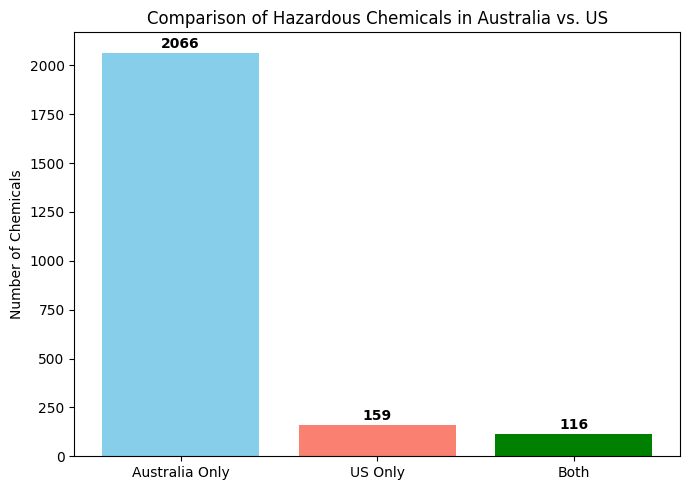

In [ ]:
# A visualisation to show Chemicals listed in both countries and Chemicals listed in one but not the other
import matplotlib.pyplot as plt

# Find the sets that store unique chemical names listed under each country’s hazard classification
au_set = set(df_hazard[df_hazard['Australian Inventory of Industrial Chemicals (Inventory) listing'].str.contains("Listed", case=False, na=False)]['Chemical name']) #na=False skips any missing/null values to prevent errors
us_set = set(df_hazard[df_hazard['United States National Toxicology Program Report on Carcinogens'].str.contains("carcinogen", case=False, na=False)]['Chemical name'])

both = au_set & us_set #gives the intersection, meaning chemicals listed in both Australia and the US
only_au = au_set - us_set #chemicals only listed in Australia
only_us = us_set - au_set #chemicals only flagged by the US


# Data for plotting
labels = ['Australia Only', 'US Only', 'Both']
sizes = [len(only_au), len(only_us), len(both)]
colors = ['skyblue', 'salmon', 'green']

# Create bar chart
plt.figure(figsize=(7, 5))
bars = plt.bar(labels, sizes, color=colors)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart title and labels
plt.title("Comparison of Hazardous Chemicals in Australia vs. US")
plt.ylabel("Number of Chemicals")
plt.tight_layout()
plt.show()



> **Key Findings:**  
- **Australia-Specific Hazard Classifications:** 2,066 chemicals listed as hazardous under Australian regulations lack carcinogen classification by the U.S. National Toxicology Program.  
- **U.S.-Specific Carcinogen Designations:** 159 substances recognized as carcinogens by U.S. authorities remain unlisted in Australia’s chemical inventory.  
- **Shared Hazard Designations:** 116 chemicals are mutually recognized as hazardous by both regulatory frameworks.  

> **Implications:**  
There is a gap in international chemical hazard recognition and potentially advocating for greater regulatory alignment or caution in cross-country imports and usage, especially in cosmetics. Or in other words, Australia and the US are not quite aligned in chemical hazard concerns.

> **Methodological Note:**  
While the **Chemicals in Cosmetics dataset** (last revised August 2024) and **AICIS High-Hazard Chemical List** (updated September 2024) were used as primary references, temporal discrepancies between reporting cycles may affect direct comparability. These findings should be interpreted as **indicative rather than definitive**, necessitating ongoing monitoring of regulatory revisions.  

> **Recommendation:**  
Stakeholders should implement enhanced due diligence protocols for international chemical procurement and product formulation, particularly for cosmetics entering cross-jurisdictional markets.  


Now, we would shift the focus to reported categories and their listed products

Text(0.5, 0, 'Number of Unique Chemicals')

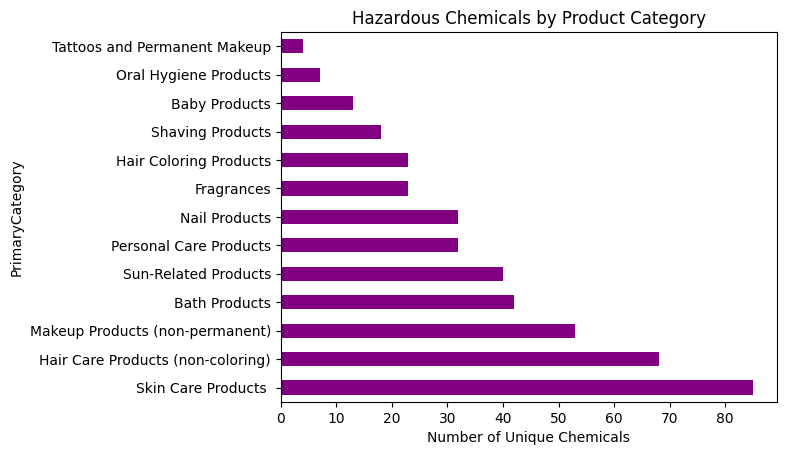

In [ ]:
#Types of products (categories) contain the most chemicals
category_chemical_counts = df.groupby('PrimaryCategory')['ChemicalName'].nunique().sort_values(ascending=False)
category_chemical_counts.plot(kind='barh', title='Hazardous Chemicals by Product Category', color='purple')
plt.xlabel('Number of Unique Chemicals')

> The graph shows that products intended for internal use or direct injection tend to contain fewer hazardous chemicals compared to those designed for external use.

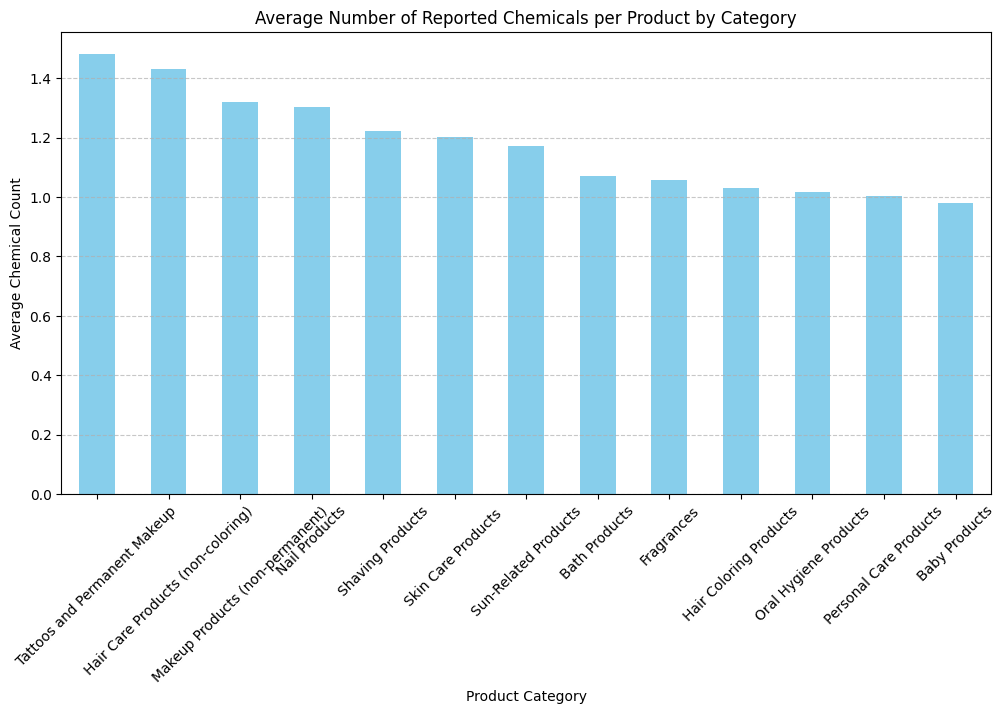

In [ ]:
# Calculate average chemical count per product by category
avg_chemicals = df.groupby('PrimaryCategory')['ChemicalCount'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12,6))
avg_chemicals.plot(kind='bar', color='skyblue')
plt.title('Average Number of Reported Chemicals per Product by Category')
plt.ylabel('Average Chemical Count')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> Interestingly, while the Tattoos and Permanent Makeup category has the highest average number of hazardous chemicals per product (~ 1.4), it features the lowest number of unique chemicals (~5). This suggests that although individual products tend to have more hazardous ingredients, the industry relies on a small, consistent pool of substances. These findings could reflect the specialized nature and regulatory limitations of this product type.

> Another explanation for this could be that since tattoo and permanent makeup products are injected or implanted into the skin, they may be subject to more cautious or regulated ingredient use, meaning fewer types of chemicals are allowed — but in slightly higher quantities per formulation.



<ipython-input-50-af3ea2979a28>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_brands_df, x='BrandName', y='ChemicalCount', palette='Set2')


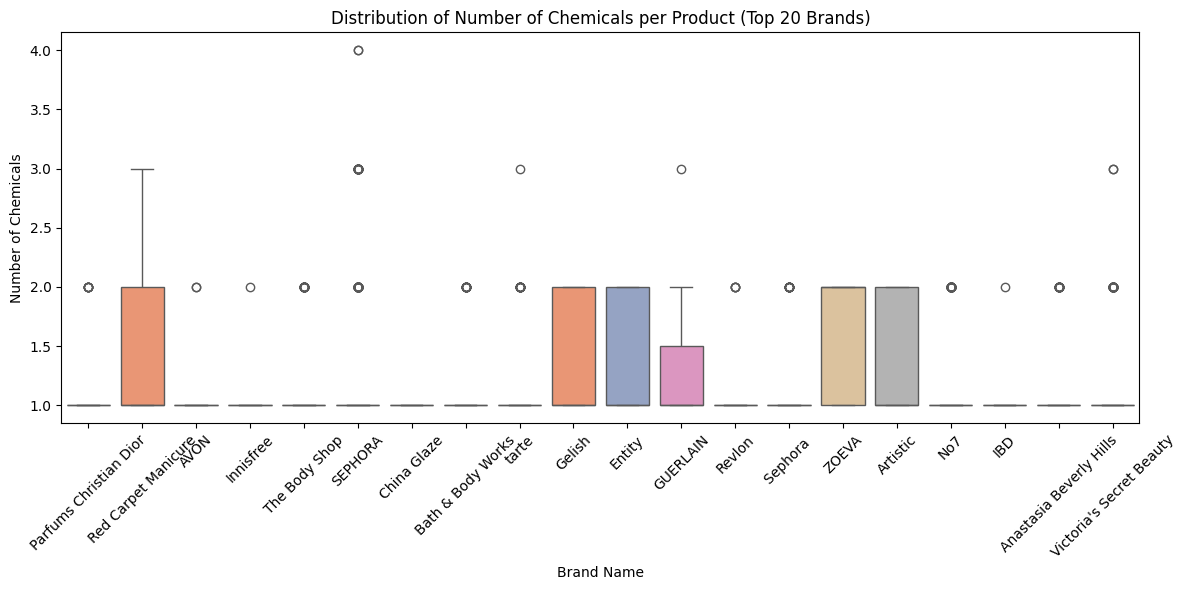

In [ ]:
# Count number of chemicals per product
chemicals_per_product = df.groupby(['ProductName', 'BrandName'])['ChemicalName'].nunique().reset_index(name='ChemicalCount')

# Count how many products each brand has
brand_counts = chemicals_per_product['BrandName'].value_counts()

# Select top  brands with most products
top_20_brands = brand_counts.head(20).index

# Filter only top 10 brands
top_brands_df = chemicals_per_product[chemicals_per_product['BrandName'].isin(top_20_brands)]

# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brands_df, x='BrandName', y='ChemicalCount', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Number of Chemicals per Product (Top 20 Brands)')
plt.ylabel('Number of Chemicals')
plt.xlabel('Brand Name')
plt.tight_layout()
plt.show()

> Key Findings:

- Parfums Chirstian Dior, Gelish, Enity, Zoeva, and Artistic have 1-2 hazardous chemicals reported in their products
- Most of the brand in top 20 have only one reported hazardous chemical in their ingredients
- The maximum chemical count for the brand of Parfums Christian Dior is 3
- Sephora have one product that contains 4 hazardous chemicals (outlier)


In top 20, the maximum harzardous chemicals found in a product is four and this is already an outlier. We will check to see if there is any products reported in this dataset contains more than four high-hazard chemicals:

In [ ]:
# Create a clean version of ProductName
df['ProductName_clean'] = df['ProductName'].str.lower().str.strip().str.replace(r'\s+', ' ', regex=False)

# Now filter products with more than 4 chemicals
products_with_more_than_4_chemicalcount = df[df['ChemicalCount'] > 4].sort_values(by='ChemicalCount', ascending=False)

# Count distinct products
unique_products = products_with_more_than_4_chemicalcount[['ProductName','BrandName','PrimaryCategory','ChemicalCount']].drop_duplicates() # this is the result if checking based on only 3 coloumns, not all 22 columns from dataset

print(f"Found {len(unique_products)} distinct products with ChemicalCount > 4:")
display(unique_products)

# drop_duplicates to make sure product do not repeat because if it has 9 different hazardous chemicals, it will be repeated 9 times, or even more due to trade secret chemical: so only 18 products in total that have > 4 high-hazard chemicals.

Found 20 distinct products with ChemicalCount > 4:


,ProductName,BrandName,PrimaryCategory,ChemicalCount
60827,Moisturizing Shampoo,Regis Design Line,Hair Care Products (non-coloring),9
15746,Texture Cream Casual Styler,Regis Design Line,Hair Care Products (non-coloring),8
15664,Hydrate Conditioner,Regis Design Line,Hair Care Products (non-coloring),8
15734,Interrupt Texturizing Clay,Regis Design Line,Hair Care Products (non-coloring),8
17619,Texture Cream,Mastercuts,Hair Care Products (non-coloring),8
17518,Interrupt Texturizing Clay,Costcutters,Hair Care Products (non-coloring),7
15776,Intensity Conditioning Therapy,Regis Design Line,Hair Care Products (non-coloring),7
15622,Hydrate Shampoo,Regis Design Line,Hair Care Products (non-coloring),7
17562,Texturizing Clay,Mastercuts,Hair Care Products (non-coloring),7
112014,Sunkissed Highlighter,Palladio,Makeup Products (non-permanent),6


> We can see that most of the product with more than 4 hazardous chemical count is from Hair Care Products category.


> We only get results based on three columns: ProductName, PrimaryCategory, and ChemicalCount, which returns 18 products containing more than four high-hazard chemicals. If we perform the analysis using all 22 columns, the results will include duplicate data (leading to inaccurate outcomes and reduced representativeness), because each row contains only one chemical, along with its associated parameters such as ChemicalId, CasNumber, CasId, and InitialDateReported.

We can run the test below to see how many products are returned when all columns in the dataset are used:



In [ ]:
# Drop duplicates across all columns
products_with_more_than_4_chemicalcount_unique = products_with_more_than_4_chemicalcount.drop_duplicates()

# Show how many truly unique rows there are
print(f"Total unique product rows with more than 4 chemicals: {len(products_with_more_than_4_chemicalcount_unique)}")

# Display the cleaned result
products_with_more_than_4_chemicalcount_unique

Total unique product rows with more than 4 chemicals: 224


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalCount,BrandName_clean,ProductName_clean,InitialDateReported_AU,DiscontinuedDate_AU,ChemicalDateRemoved_AU,BrandName_missing,ReportedYear,IsDiscontinued,ChemicalName_clean
60827,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,9,regis design line,moisturizing shampoo,04/02/2014,NaN,NaN,False,2014,False,ethylene glycol
60821,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,9,regis design line,moisturizing shampoo,04/02/2014,NaN,NaN,False,2014,False,arsenic (inorganic arsenic compounds)
60822,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,9,regis design line,moisturizing shampoo,04/02/2014,NaN,NaN,False,2014,False,dichloroacetic acid
60823,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,9,regis design line,moisturizing shampoo,04/02/2014,NaN,NaN,False,2014,False,ethylene oxide
60819,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,9,regis design line,moisturizing shampoo,04/02/2014,NaN,NaN,False,2014,False,"1,4-dioxane"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42374,14921,Retinol Cream,27700.0,Fragrance,710,"Vitamin World, Inc.",Vitamin World,90,Skin Care Products,101,...,5,vitamin world,retinol cream,27/07/2010,NaN,NaN,False,2010,False,safrole
42373,14921,Retinol Cream,27700.0,Fragrance,710,"Vitamin World, Inc.",Vitamin World,90,Skin Care Products,101,...,5,vitamin world,retinol cream,27/07/2010,NaN,NaN,False,2010,False,estragole
42387,14923,Retinol Cream,27701.0,Fragrance,710,"Vitamin World, Inc.",Vitamin World,90,Skin Care Products,101,...,5,vitamin world,retinol cream,27/07/2010,NaN,NaN,False,2010,False,methyleugenol
42385,14923,Retinol Cream,27701.0,Fragrance,710,"Vitamin World, Inc.",Vitamin World,90,Skin Care Products,101,...,5,vitamin world,retinol cream,27/07/2010,NaN,NaN,False,2010,False,estragole


In [ ]:
# Find what products include Unidentified ChemicalName == Trade Secret

df[df['ChemicalName'] == 'Trade Secret'].drop_duplicates()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalCount,BrandName_clean,ProductName_clean,InitialDateReported_AU,DiscontinuedDate_AU,ChemicalDateRemoved_AU,BrandName_missing,ReportedYear,IsDiscontinued,ChemicalName_clean
6604,2015,BubbleGum Bubbles No Tears Shampoo,NaN,NaN,120,"Farouk Systems, Inc.",BioSilk,1,Baby Products,3,...,0,biosilk,bubblegum bubbles no tears shampoo,30/09/2009,NaN,13/10/2009,False,2009,False,trade secret
12038,2902,FDS Feminine Deodorant Spray White Blossom,NaN,NaN,204,"Alberto Culver USA, Inc.",FDS,74,Personal Care Products,78,...,0,fds,fds feminine deodorant spray white blossom,08/10/2009,NaN,07/01/2010,False,2009,False,trade secret
12149,2930,Lash Primer - Confidential,NaN,NaN,206,"Melaleuca, Inc.",Sei Bella - Confidential,44,Makeup Products (non-permanent),162,...,1,sei bella confidential,lash primer - confidential,08/10/2009,NaN,08/10/2009,False,2009,False,trade secret
12150,2930,Lash Primer - Confidential,NaN,NaN,206,"Melaleuca, Inc.",Sei Bella - Confidential,44,Makeup Products (non-permanent),162,...,1,sei bella confidential,lash primer - confidential,08/10/2009,NaN,13/10/2009,False,2009,False,trade secret
12184,2933,FDS Feminine Deodorant Spray Ocean Breeze,NaN,NaN,204,"Alberto Culver USA, Inc.",FDS,74,Personal Care Products,78,...,0,fds,fds feminine deodorant spray ocean breeze,08/10/2009,NaN,07/01/2010,False,2009,False,trade secret
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86457,31729,Matte Lipstick,NaN,NaN,1183,FMK Labs,YB,44,Makeup Products (non-permanent),53,...,1,yb,matte lipstick,01/09/2017,NaN,NaN,False,2017,False,trade secret
89236,32790,SOM�RFIELD HAIR MASK CAP,49286.0,Perfume,1196,PLCosmetic,SOM�RFIELD,18,Hair Care Products (non-coloring),31,...,1,somrfield,som�rfield hair mask cap,21/03/2018,NaN,NaN,False,2018,False,trade secret
93287,33678,Professional System Heat Protect & Shine Spray,51438.0,Titanium Dioxide,1232,LEVLAD LLC,Nature's Gate,18,Hair Care Products (non-coloring),26,...,1,natures gate,professional system heat protect & shine spray,01/08/2018,30/04/2019,02/08/2018,False,2018,True,trade secret
95624,34233,Therapeutic Dandruff Shampoo 5% Coal Tar Topic...,NaN,NaN,1092,"Vi-Jon, Inc",Solimo,18,Hair Care Products (non-coloring),169,...,1,solimo,therapeutic dandruff shampoo 5% coal tar topic...,18/09/2018,NaN,NaN,False,2018,False,trade secret




> There are around 416 products have 'Trade Secret' as reported chemicals.
> In the context of chemical names, a "trade secret" means the confidential identity of a chemical compound or its formulation, where the full name is not publicly disclosed to protect a company's competitive advantage. In Australia, this protection is often granted through mechanisms like AICIS using an "AACN" (Alternative or Anonymous Chemical Name).





> - Most of the reports were conducted in October.
> - The month with least report is February.



An analysis will be conducted on the reported and removal dates to identify any potential trends or insights.

<ipython-input-55-445bc5ebb046>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_chemicals['RemovalDate'] = removed_chemicals['DiscontinuedDate'].combine_first(
<ipython-input-55-445bc5ebb046>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_chemicals['RemovalYear'] = removed_chemicals['RemovalDate'].dt.year


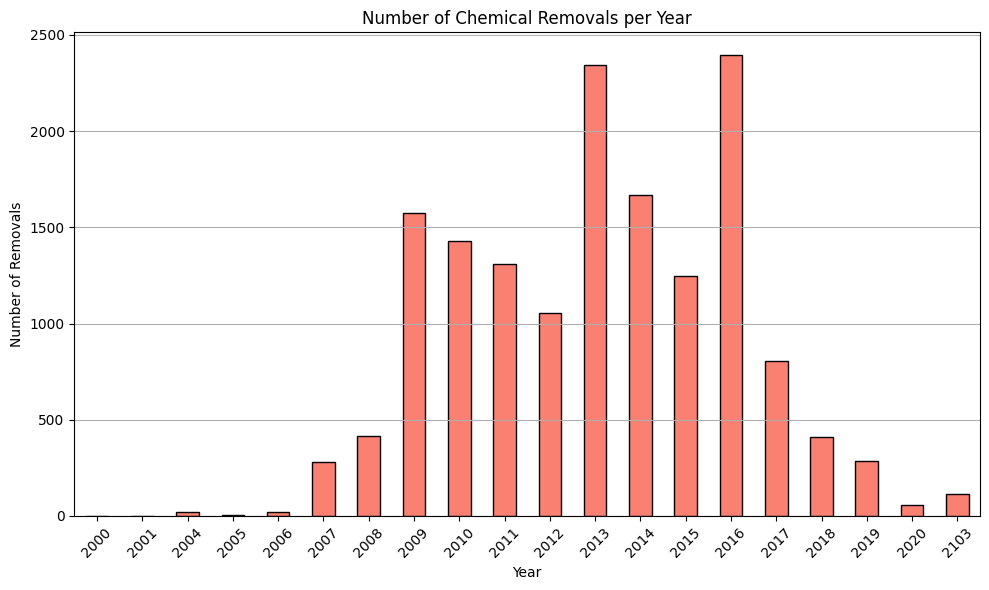

In [ ]:
# Ensure the date columns are datetime
df['DiscontinuedDate'] = pd.to_datetime(df['DiscontinuedDate'], errors='coerce')
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'], errors='coerce')

# Filter rows where either column is not null
removed_chemicals = df[
    df['DiscontinuedDate'].notna() | df['ChemicalDateRemoved'].notna()
]

# Now you can create the 'RemovalDate' column
removed_chemicals['RemovalDate'] = removed_chemicals['DiscontinuedDate'].combine_first(
    removed_chemicals['ChemicalDateRemoved']
)

# Extract year
removed_chemicals['RemovalYear'] = removed_chemicals['RemovalDate'].dt.year

# Plot histogram
plt.figure(figsize=(10,6))
removed_chemicals['RemovalYear'].dropna().value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Number of Chemical Removals per Year')
plt.xlabel('Year')
plt.ylabel('Number of Removals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

> There appears to be a data entry error, with '2013' incorrectly recorded as '2103'. As a result, any findings derived from this dataset should be considered moderately accurate and interpreted with caution.

<ipython-input-56-c46e3f23a3e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discontinued['LifetimeDays'] = (pd.to_datetime(discontinued['DiscontinuedDate'], format='%d/%m/%Y', errors='coerce') -


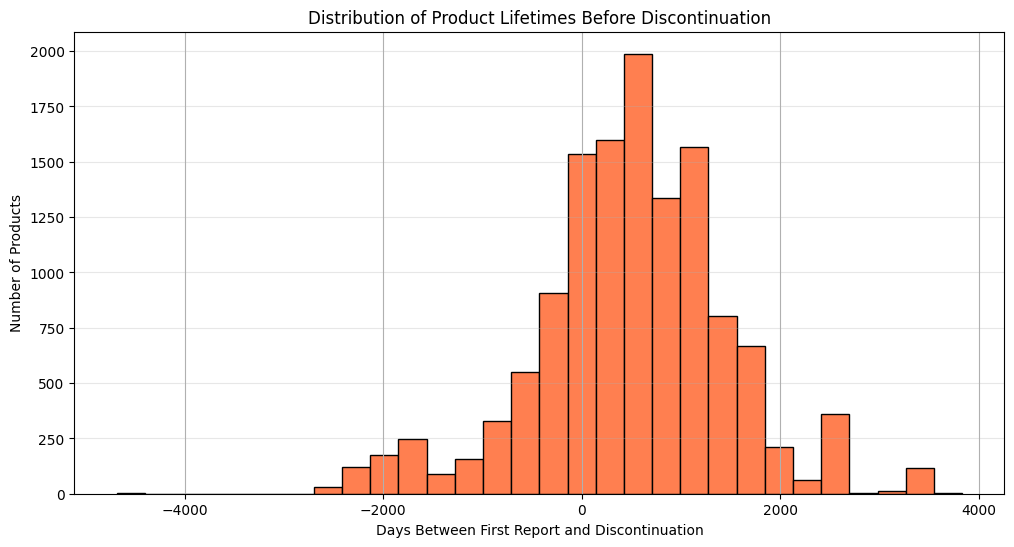

In [ ]:
discontinued = df[df['DiscontinuedDate'].notnull()]
discontinued['LifetimeDays'] = (pd.to_datetime(discontinued['DiscontinuedDate'], format='%d/%m/%Y', errors='coerce') -
                              pd.to_datetime(discontinued['InitialDateReported'], format='%d/%m/%Y', errors='coerce')).dt.days

plt.figure(figsize=(12,6))
discontinued['LifetimeDays'].hist(bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Product Lifetimes Before Discontinuation')
plt.xlabel('Days Between First Report and Discontinuation')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.3)
plt.show()

> We observed that the histogram displays a negative number of days. This anomaly is likely due to inconsistencies in data entry between the Reporting Dates and Actual Discontinuation Dates.
It is possible that some companies discontinued products prior to formally reporting them to the database, or that products were discontinued for reasons such as industrial factors or economic conditions but were reported at a later date.

In [ ]:
# Percentage of discontinued products
discontinued = df[df['DiscontinuedDate'].notnull()]
print(f"{len(discontinued)/len(df)*100:.2f}% of products have been discontinued")

# Time between initial report and discontinuation
discontinued['DaysToDiscontinue'] = (pd.to_datetime(discontinued['DiscontinuedDate']) -
                                   pd.to_datetime(discontinued['InitialDateReported'])).dt.days
print(discontinued['DaysToDiscontinue'].describe())

11.25% of products have been discontinued
count    12873.000000
mean       498.516119
std        971.193439
min      -4684.000000
25%          0.000000
50%        514.000000
75%       1112.000000
max       3832.000000
Name: DaysToDiscontinue, dtype: float64


<ipython-input-66-2d5b58378a59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discontinued['DaysToDiscontinue'] = (pd.to_datetime(discontinued['DiscontinuedDate']) -


> 11.27% of the total entries have a value in the DiscontinuedDate column — so most products are still active or haven’t been officially marked as discontinued.
> Result from describe():

> - count:    12920.000000      #Number of products with valid dates
- mean:       502.362926      #Average time to discontinuation (~502 days)
- std:        971.597970      #Standard deviation: wide variation
- min:      -4684.000000      #NEGATIVE days (means some products have a discontinued date that is earlier than the date they were first reported)
- 25% :        0.000000      #25% of products were discontinued on same day they were reported
- 50% :       515.000000      #Median: 515 days to discontinuation
- 75% :     1144.000000      #75% discontinued within ~3 years
- max:       3832.000000      #Longest time to discontinue: ~10.5 years

> In conclusion:
 - On average, products that are eventually discontinued stick around for about 1.4 years (502 days).
 - Some are discontinued immediately, but others take several years.
 - A small number of records have weird/invalid dates and may need fixing or exclusion from analysis.

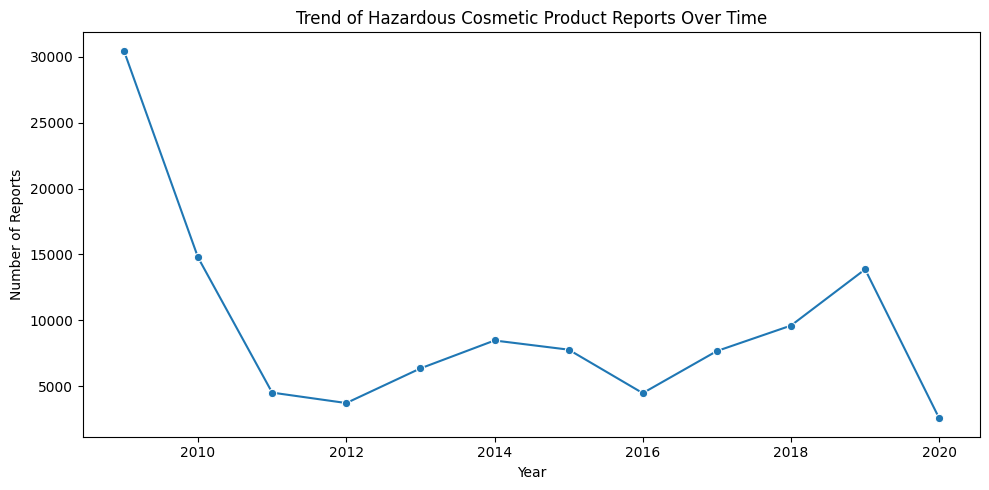

In [ ]:
# How has the reporting of certain chemicals changed over time?

#Import the seaborn library
import seaborn as sns

# Convert reporting date to datetime
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'], errors='coerce')

# Group by year
yearly_reports = df['InitialDateReported'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_reports.index, y=yearly_reports.values, marker='o')
plt.title("Trend of Hazardous Cosmetic Product Reports Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.tight_layout()
plt.show()


> - The number of reported cosmetic products steadily increased from 2012 to 2014, suggesting either growing market activity or improved regulatory monitoring.
> - There was a noticeable spike in reports around 2009–2010, possibly due to updated safety regulations or a shift in public demand for ingredient transparency.
> - Reports appear to drop significantly after 2019, which may be due to reporting lag or incomplete recent data, or COVID19 — further investigation needed.



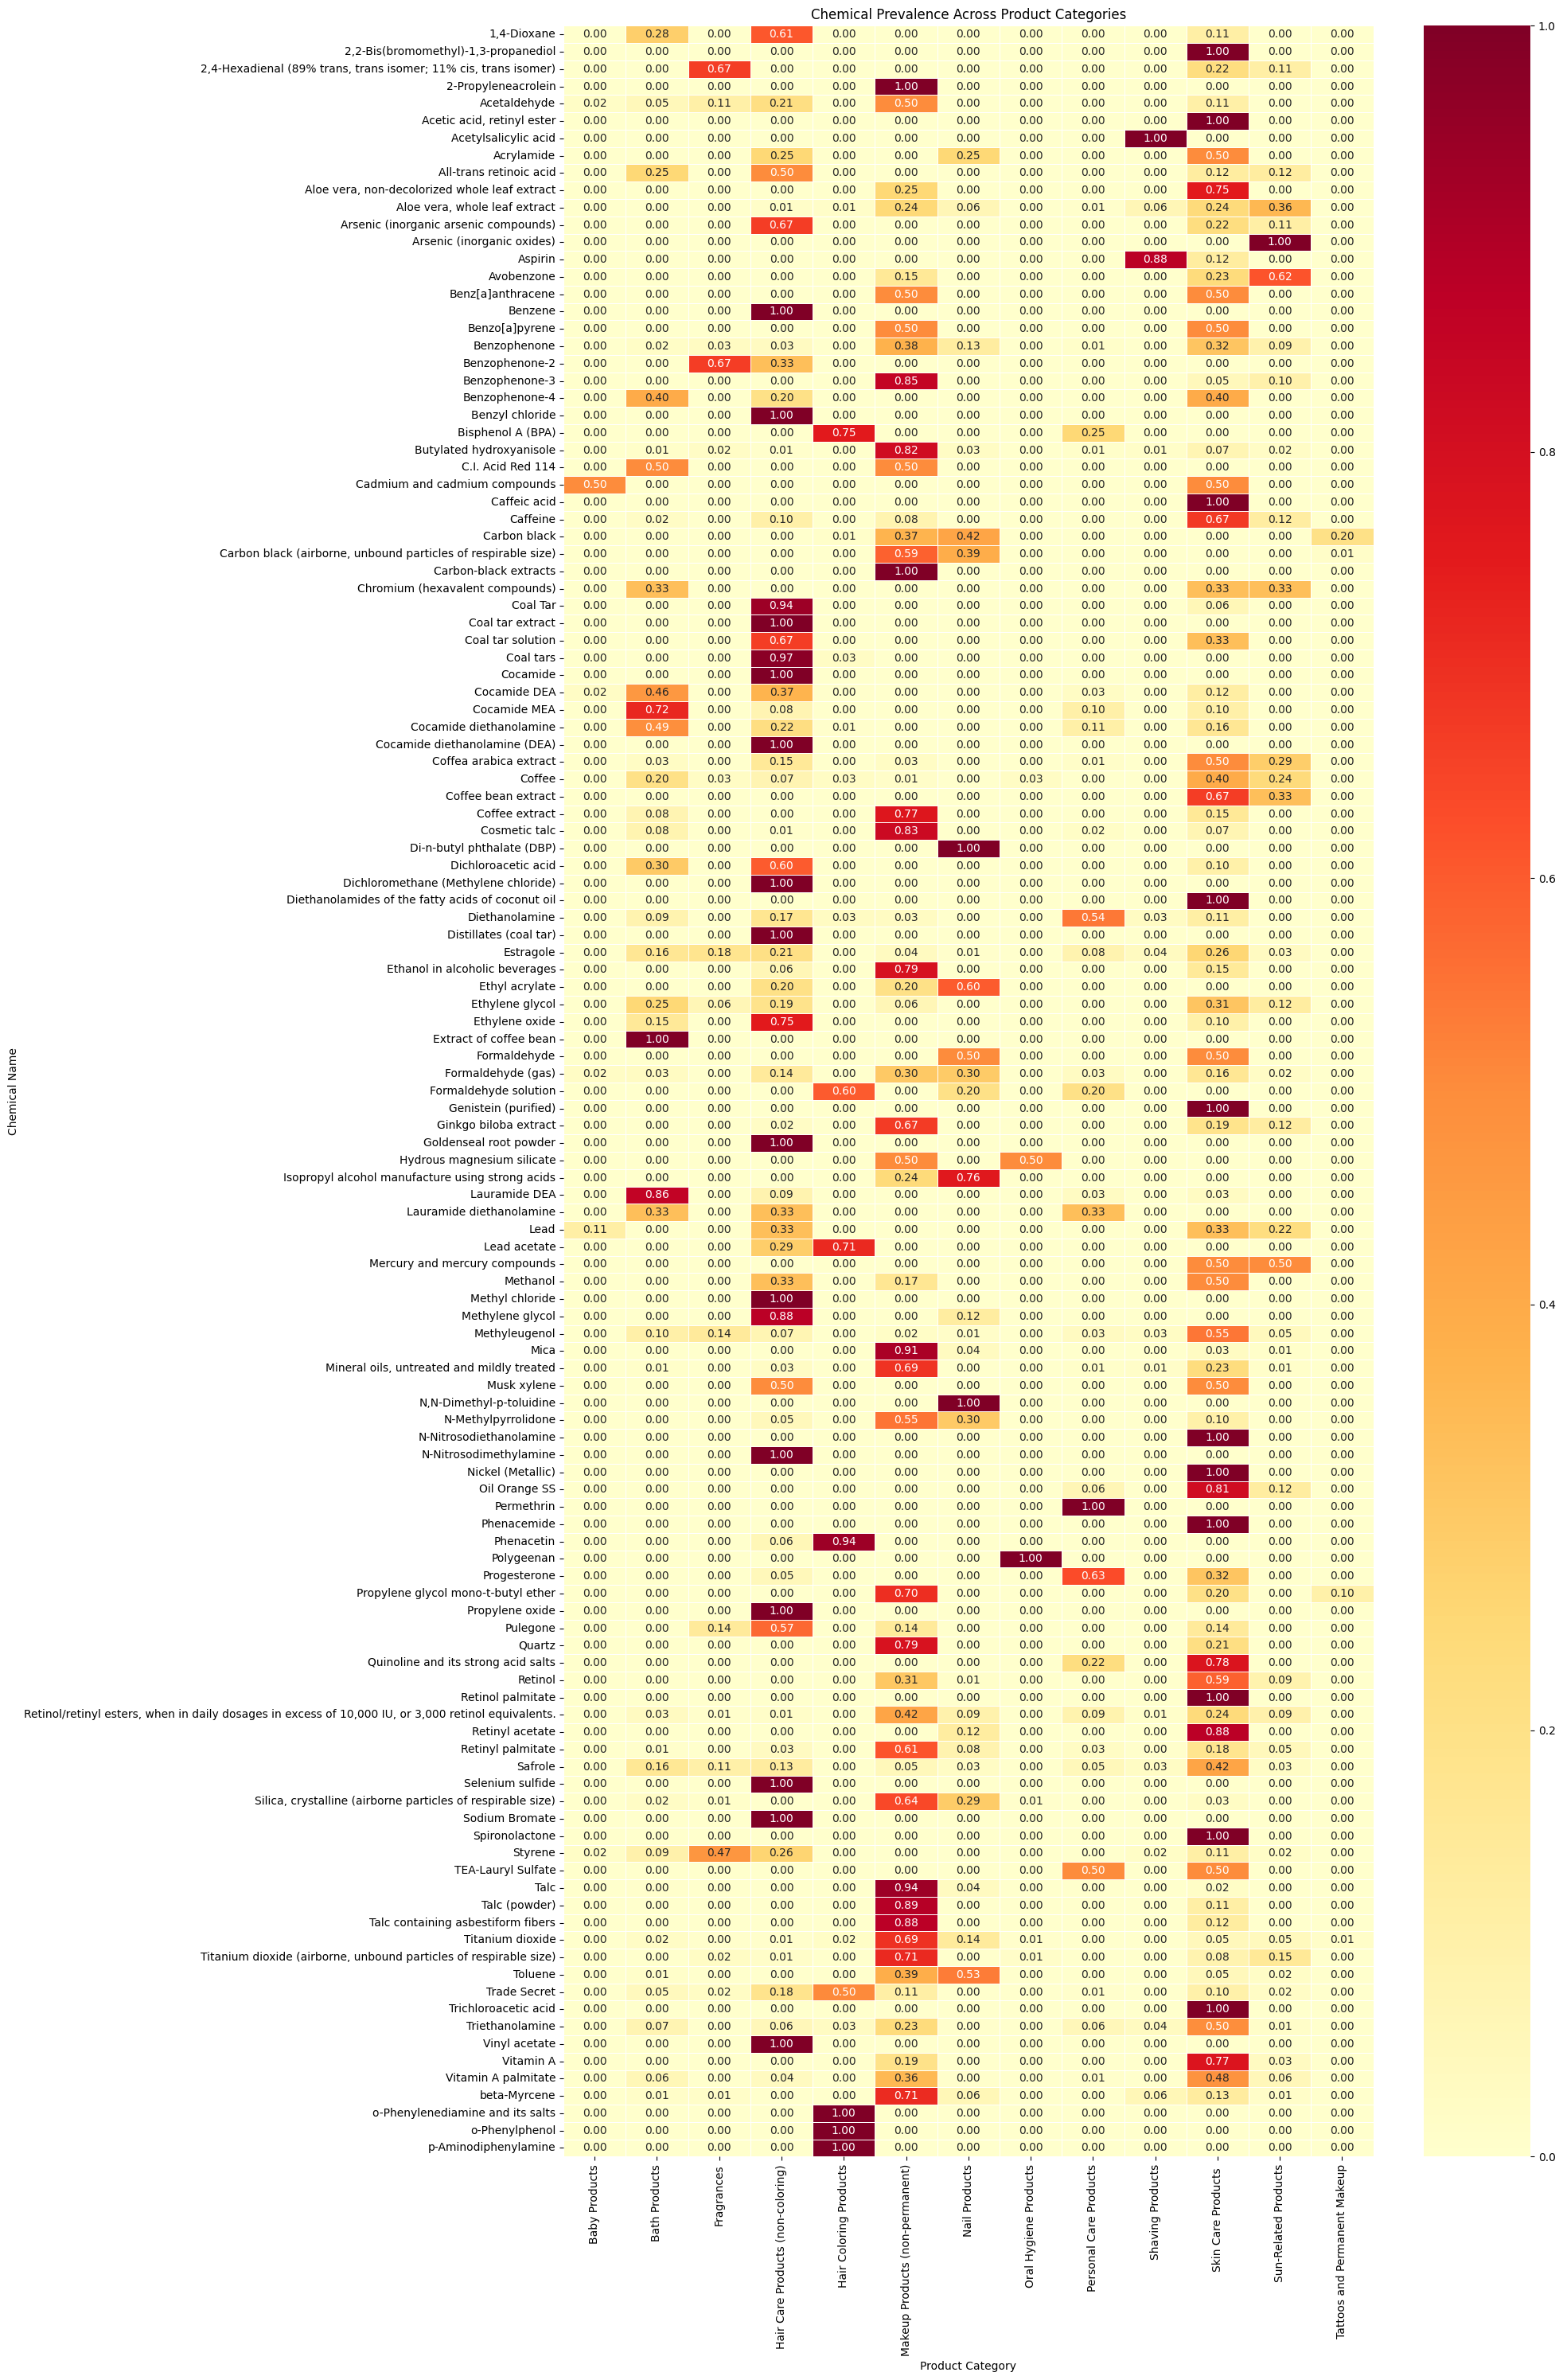

In [ ]:
# Create a cross-tabulation of chemicals vs categories
chemical_category = pd.crosstab(
    df['ChemicalName'],
    df['PrimaryCategory'],
    normalize='index'
)

plt.figure(figsize=(20,30))
sns.heatmap(
    chemical_category,
    cmap='YlOrRd',
    annot=True,   # Show the numbers
    fmt = ".2f",  # Format numbers to 2 decimal places
    linewidths=.5
)
plt.title('Chemical Prevalence Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Chemical Name')
plt.tight_layout()
plt.show()

#If plotting hundreds or thousands of chemicals, matplotlib may auto-hide or compress the tick labels.

> - Hair care products, Makeup Products (non-permanent), and Skincare Products are top 3 categories with most reported hazardous chemicals in their ingredients.
- Baby Products, Oral Hygiene Poriducts, and Tattoos and Permanent Makeup are top 3 categories with least reported hazardous chemicals in their ingredients.

Text(0.5, 1.0, 'Average Number of Hazardous Chemicals by Product Category')

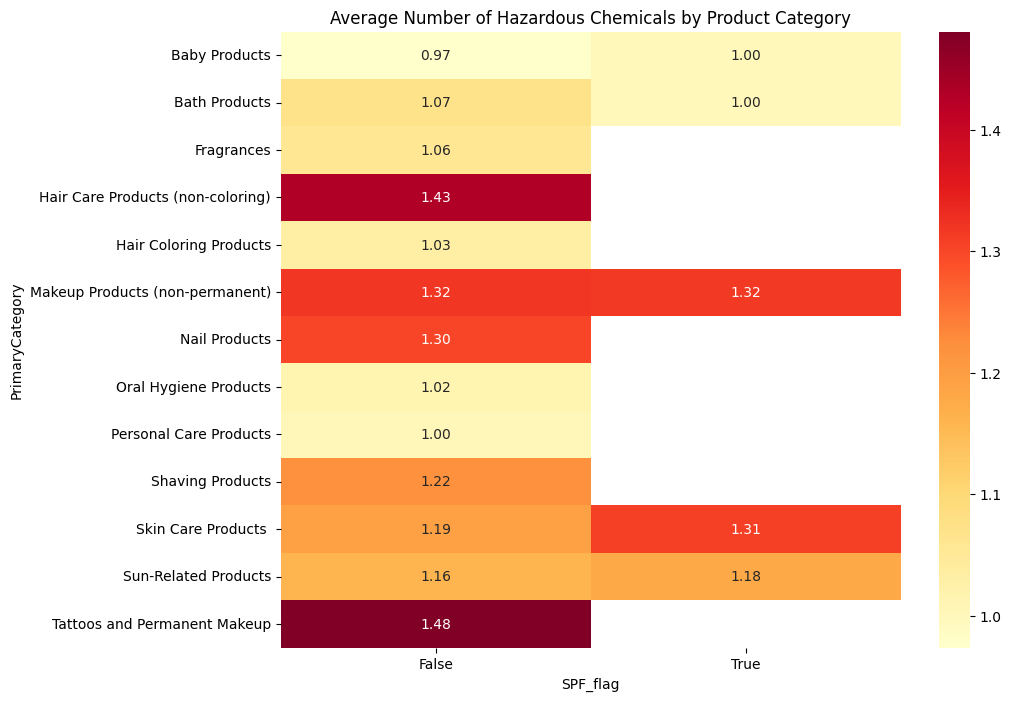

In [ ]:
#Do SPF Products Have More Hazardous Chemicals?
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure SPF flag is there
df['SPF_flag'] = df['ProductName_clean'].str.contains('spf', case=False, na=False)

# Create pivot table for heatmap: avg hazardous chemicals by SPF and category
spf_heatmap = df.pivot_table(
    index='PrimaryCategory',
    columns='SPF_flag',
    values='ChemicalCount',
    aggfunc='mean'
)

import seaborn as sns
import matplotlib.pyplot as plt

# Make sure SPF flag is there
df['SPF_flag'] = df['ProductName_clean'].str.contains('spf', case=False, na=False)

# Create pivot table for heatmap: avg hazardous chemicals by SPF and category
spf_heatmap = df.pivot_table(
    index='PrimaryCategory',
    columns='SPF_flag',
    values='ChemicalCount',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(spf_heatmap, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Number of Hazardous Chemicals by Product Category')

> From the heatmap analysis, we observe the following:
- Baby Products (1.00 vs. 0.97), Skin Care Products (1.31 vs. 1.19), and Sun-related Products (1.18 vs. 1.16) containing SPF tend to have a higher average number of hazardous chemicals compared to those without SPF.
- Bath Products with SPF, in contrast, show a lower average number of hazardous chemicals (1.07) compared to those without SPF (1.00).
- Makeup Products (non-permanent) exhibit no difference in the average number of hazardous chemicals found, regardless of whether they contain SPF.

I noticed that the dataset includes some products labeled as having a natural origin. I’m curious about the rationale for their inclusion. Let’s take a closer look to understand if there are any concerns or implications we should be aware of.

In [ ]:
# Find unique chemicals listed in ChemicalName column

df.ChemicalName.unique()

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)', 'Retinol',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A', 'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Carbon black', 'Genistein (purified)', 'Progesterone',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Mica', 'Ethylene glycol',
       'Acetic acid, retinyl ester', 'Ethyl acrylate', 'Trade Secret',
       'Methanol', 'Mineral oils, untreated 

> From the list above, I see "coffee", "aloe vera", "coconut oil" are listed. I wondered why these natural ingredients are considered 'hazardous'. I will check to see roughly how many natural ingredients are reported as hazardous in this dataset:

In [ ]:
# Define a list of natural or harmless ingredient keywords
natural_keywords = ['aloe', 'coffee', 'bean', 'coconut', 'shea', 'avocado', 'chamomile', 'jojoba', 'green tea', 'lavender', 'honey', 'rose', 'mint']

# Use .str.contains with regex OR pattern to filter rows
natural_products = df[df['ChemicalName'].str.contains('|'.join(natural_keywords), case=False, na=False)]

# Drop duplicates across full rows to get unique combinations
natural_products_unique = natural_products.drop_duplicates()

# Show results
print(f"Found {len(natural_products_unique)} products containing natural ingredients.")
natural_products_unique[['ProductName', 'BrandName', 'ChemicalName', 'PrimaryCategory']].head(30)

Found 248 products containing natural ingredients.


,ProductName,BrandName,ChemicalName,PrimaryCategory
515,Body Lotion SPF-25,Oi-Lin,Coffee,Skin Care Products
520,Body Lotion SPF-25,Oi-Lin,Coffee,Sun-Related Products
543,Deep Moisture Lotion SPF-25,Oi-Lin,Coffee,Sun-Related Products
546,Deep Moisture Lotion Tinted SPF-25,Oi-Lin,Coffee,Sun-Related Products
11992,Make A Difference Skin Rejuvenating Treatment,"Origins Natural Resources, Dist.",Coffee,Skin Care Products
11996,Make a Difference Ultra-rich rejuvenating cream,"Origins Natural Resources, Dist.",Coffee,Skin Care Products
12010,Precipitation Continuous moisture recovery for...,"Origins Natural Resources, Dist.",Coffee,Skin Care Products
12029,Precipitation Extra Continuous moisture recove...,"Origins Natural Resources, Dist.",Coffee,Skin Care Products
12045,Superdefense Age Defense Moisturizer SPF 25 Ve...,Clinique,Coffee,Sun-Related Products
12050,Superdefense Age Defense Moisturizer SPF 25 Dr...,Clinique,Coffee,Sun-Related Products


Since the first 30 rows majorly returns Coffee in ChemicalName, let's take coffee as the analysing subject here:

1. **Coffee (or more precisely, components in coffee)** can contain compounds like:
   - **Caffeic acid**
   - **Acrylamide** (formed during roasting)
   - **Certain polyphenols**

   Some of these compounds have been classified by certain regulatory or scientific bodies as *potential carcinogens* or *developmental/reproductive toxicants* - especially in high or isolated doses.

2. The **California Safe Cosmetics Program (CSCP)** uses lists from multiple "authoritative bodies" to determine what to include.
   - For example, **acrylamide** (even if it's from coffee) is listed as a potential carcinogen by the **US National Toxicology Program (NTP)**.
   - So if a product contains trace amounts of acrylamide from a coffee extract, it may trigger reporting.

3. **Presence ≠ Danger in Context**:
   - The inclusion in the dataset doesn’t necessarily mean the product is harmful in real-world use.
   - The reporting system errs on the side of caution — even if a chemical only *might* cause harm at high exposure levels.

In Conclusion:
Even **natural** ingredients can contain trace compounds that are:
- Known or suspected to be carcinogenic/reprotoxic **in specific forms or doses**.
- Flagged under broad safety regulations to ensure consumer awareness.

So, **coffee extract** may be included due to chemical components it contains, not because coffee as a food is inherently hazardous.

# DATA PREPARATION

In [ ]:
# 1.REMOVE DUPLICATES
df = df.drop_duplicates() #the result is still 114,635 entries so we will try with specific columns

#for specific clumns
df[['ProductName', 'ChemicalName']].drop_duplicates()
display(df[['ProductName', 'ChemicalName']].drop_duplicates())

,ProductName,ChemicalName
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,Titanium dioxide
1,Glover's Medicated Shampoo,Distillates (coal tar)
2,Glover's Medicated Shampoo,Estragole
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,Titanium dioxide
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,Titanium dioxide
...,...,...
114622,LIBERATTA PERFUMED CREAM,Titanium dioxide
114623,BRONZING PEARLS SOLEIL,Titanium dioxide
114626,EYESHADOW / ATARDECER NARANJA,Titanium dioxide
114630,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Titanium dioxide


In [ ]:
# 2.STANDARDIZED TEXT FIELDS
# We encountered many issues (e.g. duplicate brand names in word clouds) due to inconsistent formatting of brandnames

# Clean brand names and product names
df['BrandName_clean'] = df['BrandName'].str.strip().str.lower()
df['ProductName_clean'] = df['ProductName'].str.strip().str.lower()

#Removed special characters
df['BrandName_clean'] = df['BrandName_clean'].str.replace(r'[^\w\s]', '', regex=True)
df['ProductName_clean'] = df['ProductName_clean'].str.replace(r'[^\w\s]', '', regex=True)

display(df[['BrandName_clean', 'ProductName_clean']])

,BrandName_clean,ProductName_clean
0,avon,ultra color rich extra plump lipstickall shades
1,glovers,glovers medicated shampoo
2,glovers,glovers medicated shampoo
3,avon,precision glimmer eye linerall shades
4,avon,avon brilliant shine lip glossall shades
...,...,...
114630,yanbal,hydralip translucent color lipstick
114631,yanbal,hydralip translucent color lipstick
114632,yanbal,hydralip translucent color lipstick
114633,yanbal,hydralip translucent color lipstick


In [ ]:
# 3.CONVERT DATE DATA TO AUSTRALIAN FORMAT (DD/MM/YYYY) FOR EASY FILTERING AND MORE AUSTRALIAN-FRIENDLY TIME-BASED ANALYSIS RESULT

# Step 1: Convert date columns to datetime objects (if not already)
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'], errors='coerce')
df['DiscontinuedDate'] = pd.to_datetime(df['DiscontinuedDate'], errors='coerce')
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'], errors='coerce')

# Step 2: Format them as Australian style DD/MM/YYYY (for display or export)
df['InitialDateReported_AU'] = df['InitialDateReported'].dt.strftime('%d/%m/%Y')
df['DiscontinuedDate_AU'] = df['DiscontinuedDate'].dt.strftime('%d/%m/%Y')
df['ChemicalDateRemoved_AU'] = df['ChemicalDateRemoved'].dt.strftime('%d/%m/%Y')

In [ ]:
# Check to see how date data display
df[['InitialDateReported', 'InitialDateReported_AU', 'DiscontinuedDate', 'DiscontinuedDate_AU', 'ChemicalDateRemoved', 'ChemicalDateRemoved_AU']].head()

,InitialDateReported,InitialDateReported_AU,DiscontinuedDate,DiscontinuedDate_AU,ChemicalDateRemoved,ChemicalDateRemoved_AU
0,2009-06-17,17/06/2009,2011-02-01,01/02/2011,NaT,NaN
1,2009-07-01,01/07/2009,NaT,NaN,NaT,NaN
2,2009-07-01,01/07/2009,NaT,NaN,NaT,NaN
3,2009-07-09,09/07/2009,NaT,NaN,NaT,NaN
4,2009-07-09,09/07/2009,2011-02-01,01/02/2011,NaT,NaN


In [ ]:
# 4.FILL OR FLAG MISSING VALUES

# Create a new column flagging missing data
df['BrandName_missing'] = df['BrandName'].isnull()
# Check
df[['BrandName', 'BrandName_missing']].head()

,BrandName,BrandName_missing
0,AVON,False
1,Glover's,False
2,Glover's,False
3,AVON,False
4,AVON,False


In [ ]:
# Extract missing brandname by finding true value for the created flagging column
missing_brandnames = df[df['BrandName_missing'] == True]
missing_brandnames[['BrandName', 'BrandName_missing']].head()

,BrandName,BrandName_missing
3681,NaN,True
3691,NaN,True
3692,NaN,True
3693,NaN,True
3694,NaN,True


In [ ]:
#Find product that does not have a brand name
products_no_brand = df[df['BrandName'].isnull()]

# Display the first few rows
products_no_brand.tail(10)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,BrandName_clean,ProductName_clean,InitialDateReported_AU,DiscontinuedDate_AU,ChemicalDateRemoved_AU,BrandName_missing
56538,20585,Liquid Hand Soap Lavender Chamomile Scent,30222.0,"FD&C Blue No 1, FD&C Red No 33 - Lavender Cham...",717,"Greenbrier International, Inc.",NaN,90,Skin Care Products,102,...,08/21/2013,08/21/2013,NaT,1,NaN,liquid hand soap lavender chamomile scent,21/08/2013,NaN,NaN,True
59101,21455,Refreshing Apricot Scrub Exfoliant,31915.0,"Red 33, Yellow 5, Yellow 6 - Apricot",717,"Greenbrier International, Inc.",NaN,90,Skin Care Products,93,...,11/08/2013,11/08/2013,NaT,1,NaN,refreshing apricot scrub exfoliant,08/11/2013,NaN,NaN,True
59102,21456,Hand Soap Anitbacterial,31916.0,"FD&C Red 33, FD&C Yellow 5, FD&C Yellow 6",717,"Greenbrier International, Inc.",NaN,90,Skin Care Products,93,...,11/08/2013,11/08/2013,NaT,1,NaN,hand soap anitbacterial,08/11/2013,NaN,NaN,True
80160,29070,OWL BODY LOTION,NaN,NaN,808,Atlas Development Limited,NaN,90,Skin Care Products,105,...,10/05/2016,10/05/2016,NaT,1,NaN,owl body lotion,05/10/2016,NaN,NaN,True
98653,36247,APRICOT SCRUB,NaN,NaN,1296,"Ningbo Rejoice I/E Co., Ltd.",NaN,90,Skin Care Products,93,...,01/22/2019,01/22/2019,NaT,1,NaN,apricot scrub,22/01/2019,NaN,NaN,True
112450,40910,White Glycerin Soap,63665.0,white - none - none,1358,"Jiangxi Iris Chemical Co.,Ltd",NaN,6,Bath Products,159,...,01/16/2020,01/16/2020,NaT,1,NaN,white glycerin soap,16/01/2020,NaN,NaN,True
114045,41387,GLITTER HAIR KIT,64740.0,Red,1390,Guangzhou Baiyun Darong Fine Chemical Industry...,NaN,32,Hair Coloring Products,171,...,04/13/2020,04/13/2020,NaT,1,NaN,glitter hair kit,13/04/2020,NaN,NaN,True
114046,41387,GLITTER HAIR KIT,64741.0,Blue,1390,Guangzhou Baiyun Darong Fine Chemical Industry...,NaN,32,Hair Coloring Products,171,...,04/13/2020,04/13/2020,NaT,1,NaN,glitter hair kit,13/04/2020,NaN,NaN,True
114047,41387,GLITTER HAIR KIT,64742.0,Pink,1390,Guangzhou Baiyun Darong Fine Chemical Industry...,NaN,32,Hair Coloring Products,171,...,04/13/2020,04/13/2020,NaT,1,NaN,glitter hair kit,13/04/2020,NaN,NaN,True
114048,41387,GLITTER HAIR KIT,64743.0,Purple,1390,Guangzhou Baiyun Darong Fine Chemical Industry...,NaN,32,Hair Coloring Products,171,...,04/13/2020,04/13/2020,NaT,1,NaN,glitter hair kit,13/04/2020,NaN,NaN,True




> In the cosmetics context, a company that doesn't have a brand name essentially operates without a distinct identity or recognition. This means it's not well-known, and its products are likely not easily distinguishable from competitors. Without a brand, it faces difficulties in building customer loyalty, launching new products, and protecting its intellectual property.


In [ ]:
# Replace missing BrandName with "Unknown"
df['BrandName'] = df['BrandName'].fillna('Unknown')

In [ ]:
# 5.CREATE USEFUL FEATURES

# Ensure 'InitialDateReported' is in datetime format
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'])

# Year reported
df['ReportedYear'] = df['InitialDateReported'].dt.year

# IsDiscontinued flag
df['IsDiscontinued'] = df['DiscontinuedDate'].notnull()

#Check
df[['InitialDateReported', 'ReportedYear', 'IsDiscontinued']].head()

,InitialDateReported,ReportedYear,IsDiscontinued
0,2009-06-17,2009,True
1,2009-07-01,2009,False
2,2009-07-01,2009,False
3,2009-07-09,2009,False
4,2009-07-09,2009,True


In [ ]:
# 6.CHECK COLUMN VALUE UNIQUENESS
#See how messy a column is (e.g. different spellings for one brand):
df['BrandName'].nunique()
df['BrandName'].value_counts().head(20)

,count
BrandName,
SEPHORA,3394
NYX,3227
bareMinerals,3158
Charlotte Tilbury,2451
Revlon,2335
NARS,2185
Victoria's Secret Beauty,2106
tarte,2101
Sally Hansen,1834


# CONCLUSION AND RECOMMENDATION

## Conclusions
This exploratory data analysis investigated hazardous chemical usage in cosmetics, focusing on identifying trends and risks, while also highlighting gaps in regulatory frameworks relevant to Australia. The results underscore the need for better alignment between U.S. and Australian regulations, as well as the importance of ongoing vigilance to ensure consumer safety. By examining a range of products and brands, the study provides valuable insights into areas that require attention for improved safety standards and consumer protection.

## Recommendations
- **Increase regulatory alignment**: Australian authorities could benefit from **reviewing** and possibly **tightening** chemical safety standards, learning from California’s updated legislation.
- **Encourage ingredient transparency**: Require brands to disclose all chemical risks clearly, especially for products labeled "natural" or "SPF."
- **Promote safer cosmetic sunscreens formulations**: As SPF products tend to contain more hazardous chemicals, promoting or certifying safer SPF alternatives could help protect consumers.
- **Monitor and update product databases regularly**: Ensure that discontinued or reformulated products are updated **in real-time** to close the compliance gap.
- **Educate consumers**: Build awareness that "natural" doesn’t always mean "safe" and that **product type** influences chemical exposure risks.
- **Prioritize stricter monitoring** of brands with historically higher counts of hazardous ingredients to encourage better manufacturing practices.